# FINAL PROJECT DATA SCIENCE TEAM FINLANDIA

Project yang akan dikerjakan adalah memecahkan persoalan customer dari perusahaan Fashion Campus dimana customer banyak yang tidak kembali lagi ke platform untuk melakukan transaksi. Sehingga tim ds ditugaskan untuk menganalisa kejadian ini dengan membuat churn prediction model yang akan ditujukan oleh stakeholder yang ingin mengetahui probabilitas user terhadap churn pada satu bulan yang akan datang, serta mereka juga ingin mengetahui seberapa akurat model yang dibuat dikarenakan ini akan berdampak pada keputusan strategi yang akan dibuat tim marketing dan juga tim bisnis.

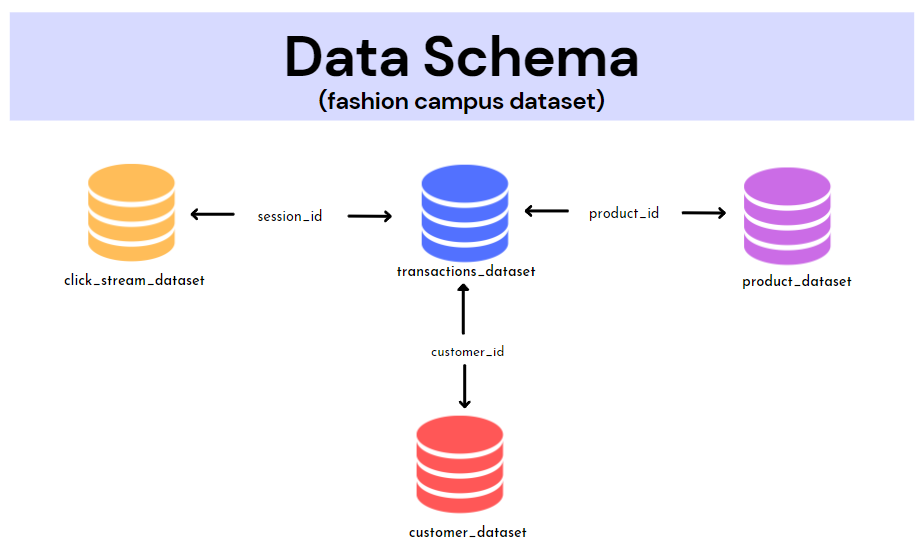

## Import library

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#installing libraries for working with excel file, and missing values
!pip install openpyxl
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=f671b8f38e7489ee82b71bde0580557967b63b8f343b301ce11b643fb3a62e19
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=42cef32deb4753c848115ae8dd3eb748346bfb223f63069f22be4be124d94f7b
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
# melakukan import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from pathlib import Path
from fancyimpute import IterativeImputer

import warnings
warnings.filterwarnings('ignore')

## read data

In [ ]:
# membaca dataset
df_final = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/Last Project/data_fix/fix_feature_train_jan20_des21.csv')

In [ ]:
# menghapus kolom tidak berguna
df_final.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39756 entries, 0 to 39755
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 39756 non-null  int64  
 1   recency                     39756 non-null  int64  
 2   num_order_distinct_product  39756 non-null  int64  
 3   frequency                   39756 non-null  float64
 4   promo_used                  39756 non-null  float64
 5   average_monetary            39756 non-null  float64
 6   average_shipment_fee        39756 non-null  float64
 7   basket_size                 39756 non-null  int64  
 8   hour_spend_on_app           39756 non-null  float64
 9   tenure                      39756 non-null  int64  
 10  customer_type               39756 non-null  object 
 11  customer_status             39756 non-null  object 
 12  is_churn                    39756 non-null  object 
dtypes: float64(5), int64(5), object

In [ ]:
df_final.head(10)

,customer_id,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type,customer_status,is_churn
0,7279,6,52,10.0,4.0,650141.0,11000.0,66,57.58,489,Existing Customer,Active,No
1,82542,259,1,0.0,0.0,0.0,0.0,3,0.27,5,New Customer,Inactive,Yes
2,8031,135,2,0.0,0.0,0.0,0.0,5,249.18,706,Existing Customer,Inactive,Yes
3,9152,114,2,0.0,0.0,0.0,0.0,7,1678.36,657,Existing Customer,Inactive,Yes
4,22199,79,7,1.0,0.0,108574.0,0.0,24,556.50,689,Existing Customer,Active,Yes
5,94370,13,26,4.0,1.0,282771.0,7500.0,38,217.27,1393,Existing Customer,Active,No
6,73093,159,1,0.0,0.0,0.0,0.0,1,0.85,1,New Customer,Inactive,Yes
7,72106,40,5,2.0,1.0,453573.0,12500.0,18,529.54,204,Existing Customer,Active,No
8,97883,150,4,0.0,0.0,0.0,0.0,11,526.68,1465,Existing Customer,Inactive,Yes
9,3434,725,1,0.0,0.0,0.0,0.0,0,0.00,946,Existing Customer,Inactive,Yes


In [ ]:
df_final['is_churn'].value_counts()

Yes    24430
No     15326
Name: is_churn, dtype: int64

## EDA

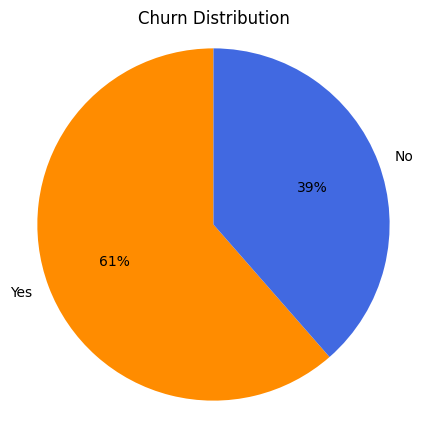

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'churn' column is binary with values 'Yes' and 'No'
churn_counts = df_final['is_churn'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%.f%%', startangle=90, colors=['darkorange', 'royalblue'])
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


Berdasarkan hasil diatas, dapat diketahui sebaran data secara keseluruhan customer melakukan churn, dengan churn sebanyak 61% dan no churn sebanyak 39%. Ada lebih banyak pelanggan yang meninggalkan perusahaan daripada pelanggan yang bertahan.Rasio pelanggan yang  tidak churn dan churn adalah 1 banding 2, sehingga tingkat churn sangat tinggi, yang merupakan hal yang normal sehingga membuat data menjadi tidak seimbang.

**EDA Variabel Category**

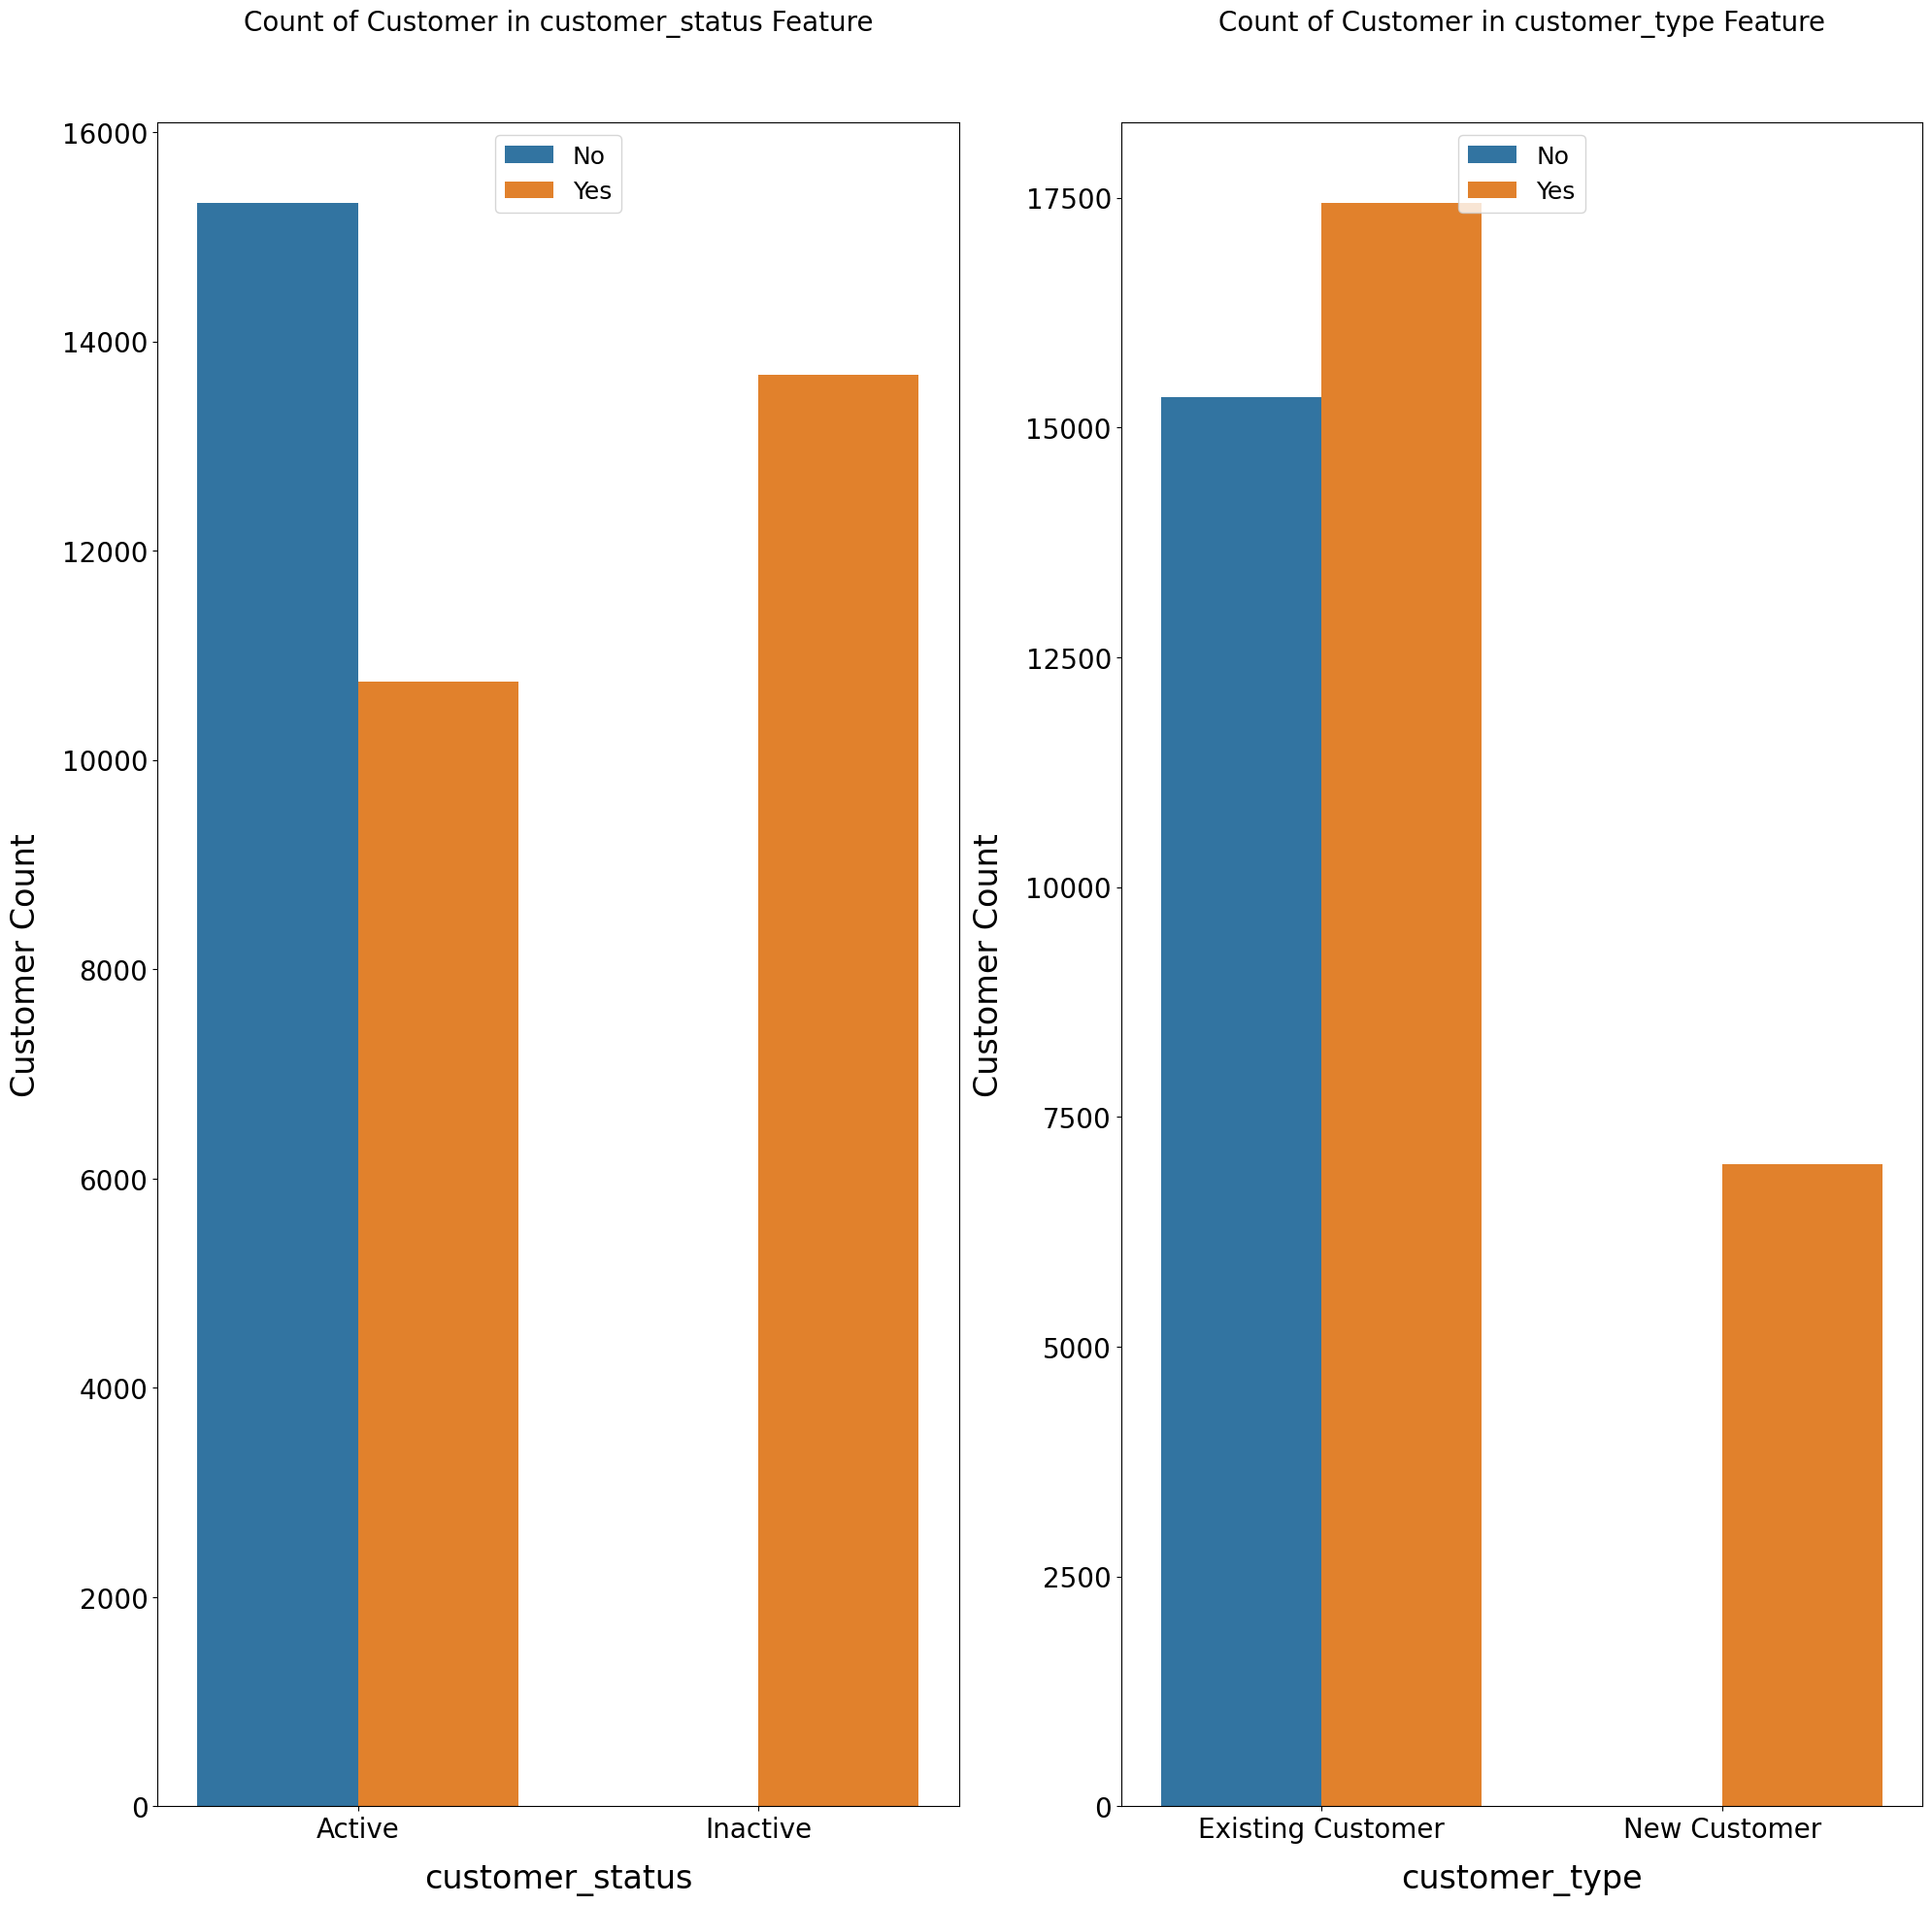

In [ ]:
cat_features = ['customer_status','customer_type']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
	plt.subplot(1, 2, i)
	sns.countplot(x=feature, hue='is_churn', data=df_final)

	plt.xlabel('{}'.format(feature), size=24, labelpad=15)
	plt.ylabel('Customer Count', size=24, labelpad=15)
	plt.tick_params(axis='x', labelsize=20)
	plt.tick_params(axis='y', labelsize=20)

	plt.legend(['No', 'Yes'], loc='upper center', prop={'size': 18})
	plt.title('Count of Customer in {} Feature'.format(feature), size=20, y=1.05)

plt.tight_layout()
plt.show()

**EDA Variabel Numerik**

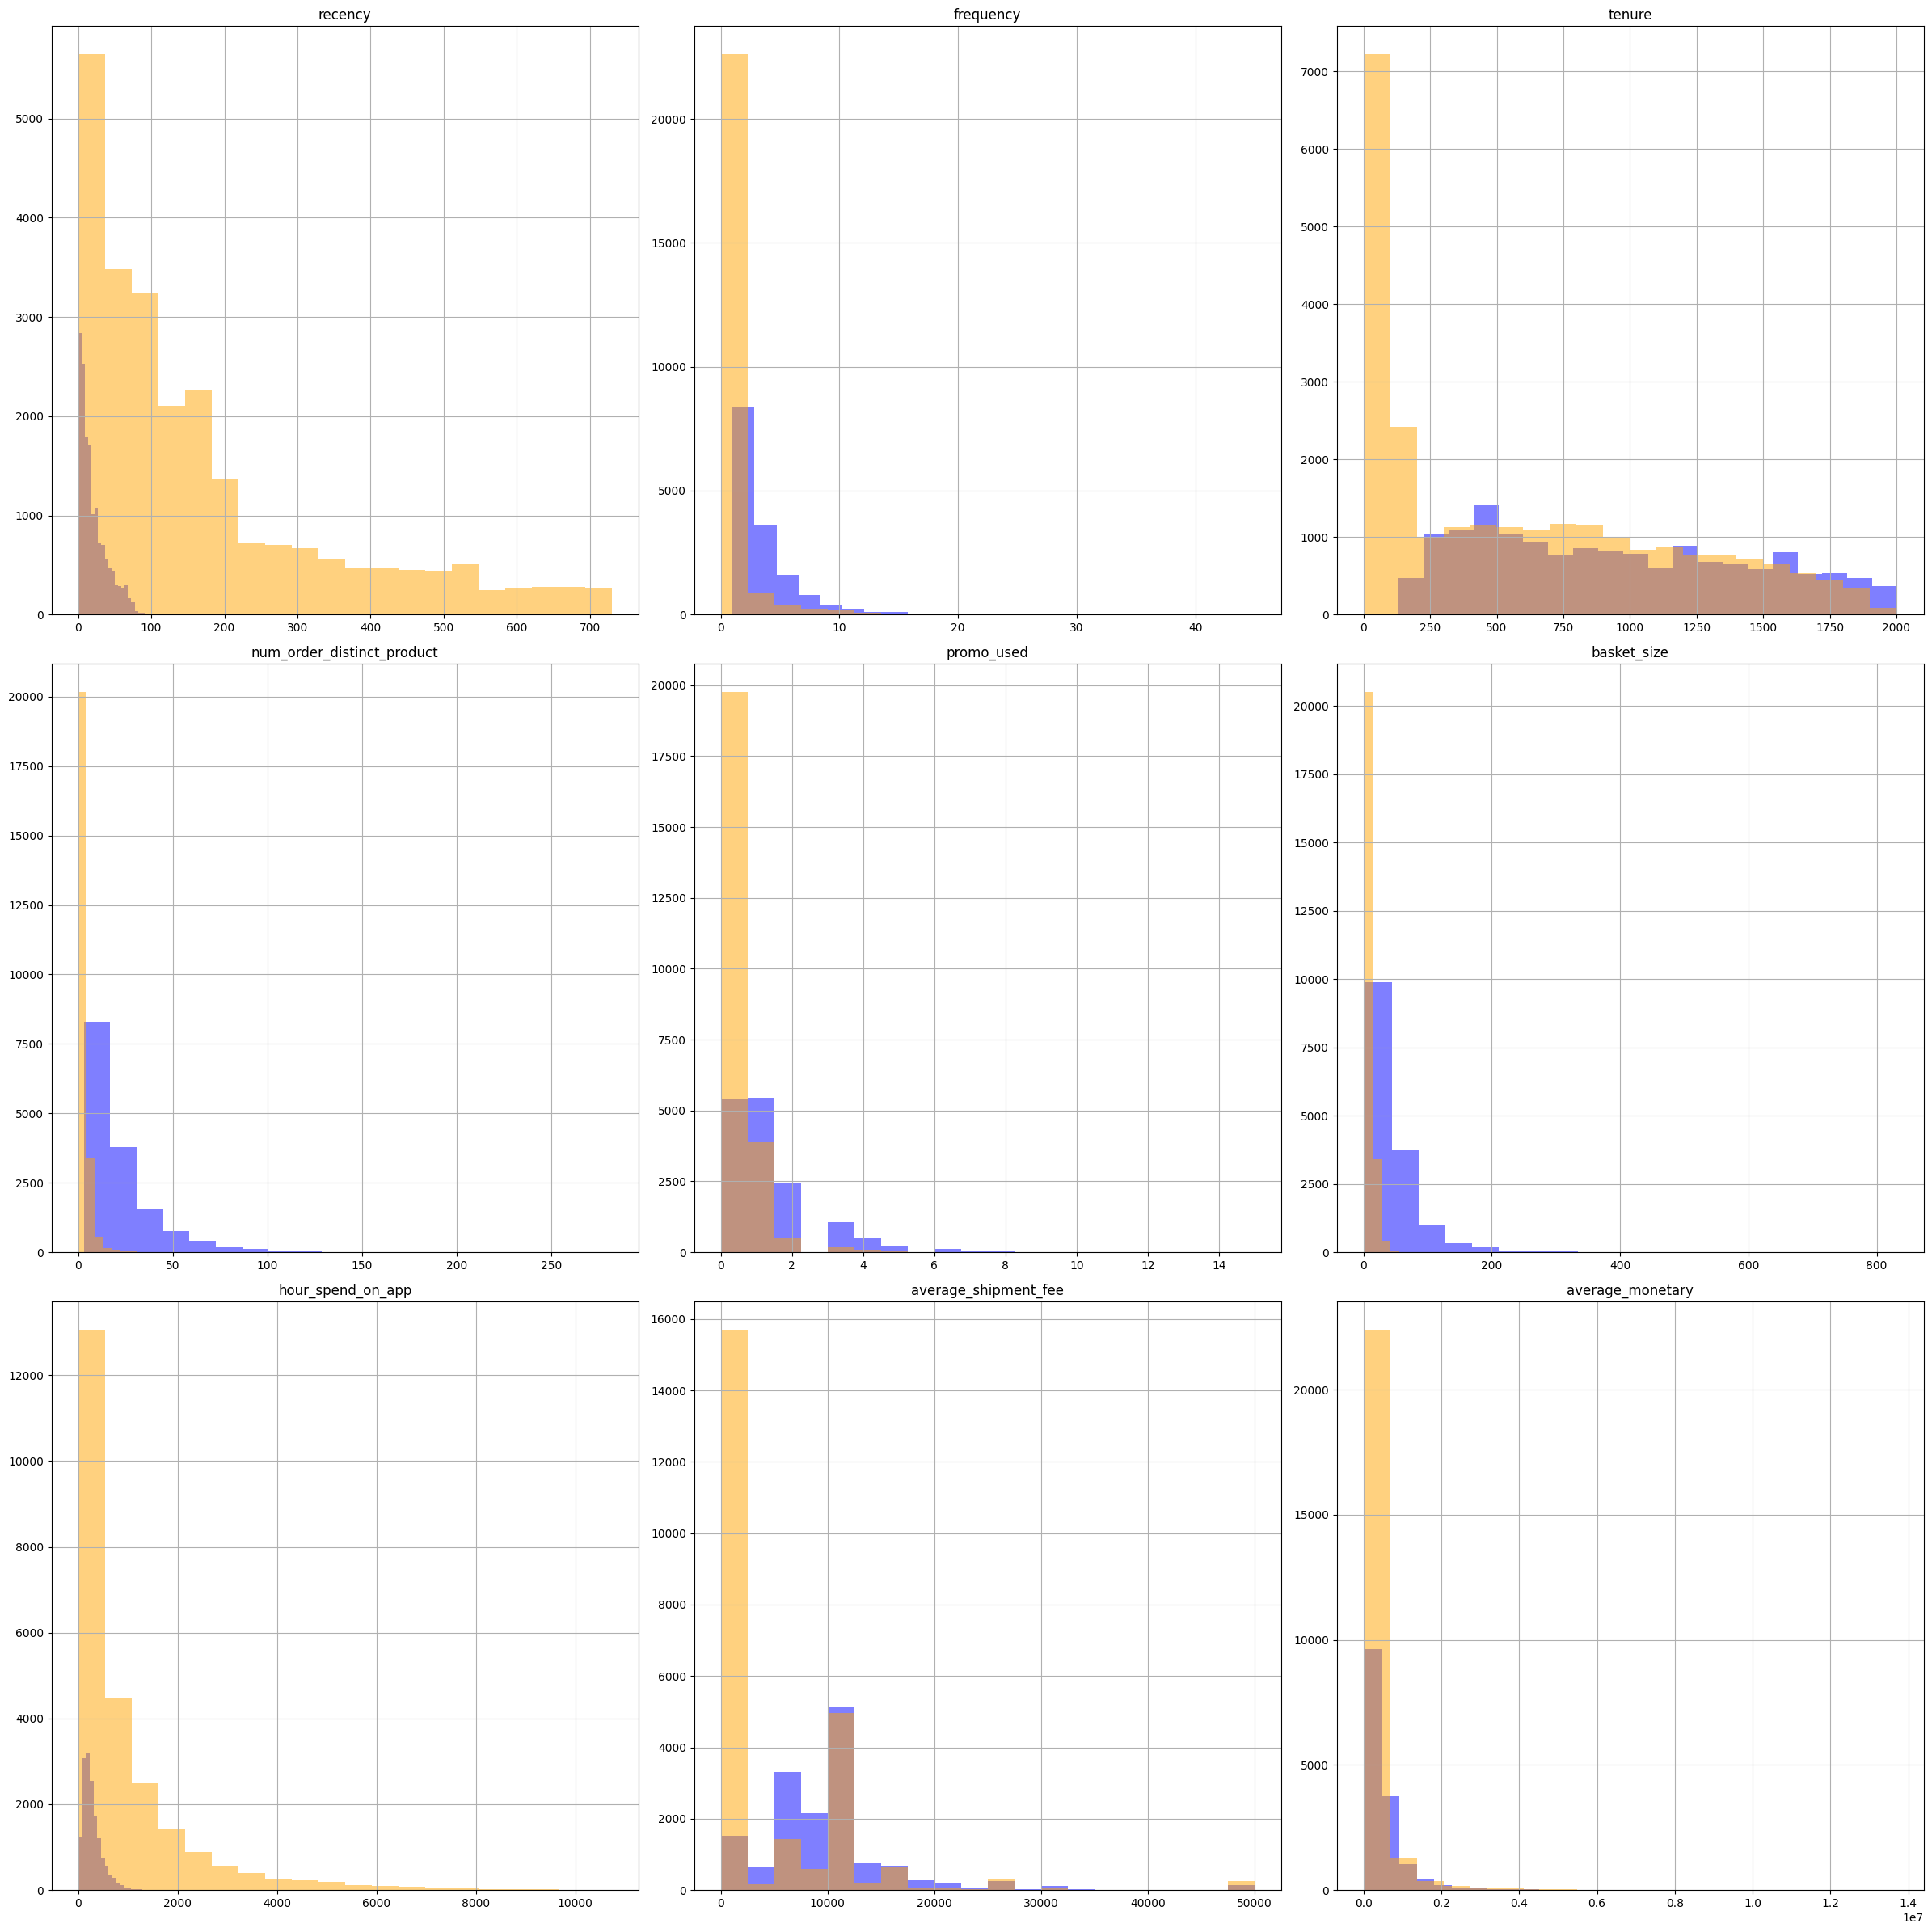

In [ ]:
import matplotlib.pyplot as plt

numerical_features = ['recency', 'frequency','tenure','num_order_distinct_product','promo_used','basket_size','hour_spend_on_app','average_shipment_fee','average_monetary']

# Create a 2x3 grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(24, 24))

# Loop through the numerical features and plot the histograms for 'No' and 'Yes' churn categories
for i, feature in enumerate(numerical_features):
    # Plot histogram for 'No' churn category
    df_final[df_final.is_churn == 'No'][feature].hist(bins=20, color='blue', alpha=0.5, ax=ax[i // 3, i % 3])
    # Plot histogram for 'Yes' churn category
    df_final[df_final.is_churn == 'Yes'][feature].hist(bins=20, color='orange', alpha=0.5, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_title(feature)  # Set subplot title

plt.tight_layout()  # Adjust the layout to prevent overlapping of subplots
plt.show()


In [ ]:
df_final.describe(include='all')

,customer_id,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type,customer_status,is_churn
count,39756.000000,39756.000000,39756.000000,39756.000000,39756.000000,3.975600e+04,39756.000000,39756.000000,39756.000000,39756.000000,39756,39756,39756
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Existing Customer,Active,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32769,26072,24430
mean,49806.860751,112.735386,10.309010,1.812456,0.619705,3.609475e+05,6057.202359,22.981185,676.789051,719.697304,NaN,NaN,NaN
std,28960.076584,155.669463,15.796856,2.721721,1.116971,5.854039e+05,7478.191183,34.300195,1093.298729,567.299308,NaN,NaN,NaN
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,24767.000000,14.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,4.000000,109.797500,199.000000,NaN,NaN,NaN
50%,49742.000000,45.000000,4.000000,1.000000,0.000000,2.385885e+05,5000.000000,12.000000,290.220000,638.000000,NaN,NaN,NaN
75%,74885.250000,146.000000,12.000000,2.000000,1.000000,4.392415e+05,10000.000000,29.000000,738.570000,1174.000000,NaN,NaN,NaN


**Korelasi Antar Fitur**

In [ ]:
df_final.corr().abs()

,customer_id,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure
customer_id,1.000000,0.005846,0.000912,0.000602,0.003714,0.006104,0.006282,0.000002,0.002832,0.002795
recency,0.005846,1.000000,0.354519,0.416567,0.344967,0.335517,0.440488,0.343942,0.270674,0.172680
num_order_distinct_product,0.000912,0.354519,1.000000,0.822363,0.744172,0.167198,0.223090,0.900244,0.232702,0.275991
frequency,0.000602,0.416567,0.822363,1.000000,0.760009,0.214073,0.280033,0.707728,0.269784,0.032055
promo_used,0.003714,0.344967,0.744172,0.760009,1.000000,0.173065,0.237720,0.671014,0.215397,0.154619
average_monetary,0.006104,0.335517,0.167198,0.214073,0.173065,1.000000,0.274062,0.191467,0.146176,0.058022
average_shipment_fee,0.006282,0.440488,0.223090,0.280033,0.237720,0.274062,1.000000,0.218077,0.196665,0.074149
basket_size,0.000002,0.343942,0.900244,0.707728,0.671014,0.191467,0.218077,1.000000,0.214437,0.306387
hour_spend_on_app,0.002832,0.270674,0.232702,0.269784,0.215397,0.146176,0.196665,0.214437,1.000000,0.233112
tenure,0.002795,0.172680,0.275991,0.032055,0.154619,0.058022,0.074149,0.306387,0.233112,1.000000


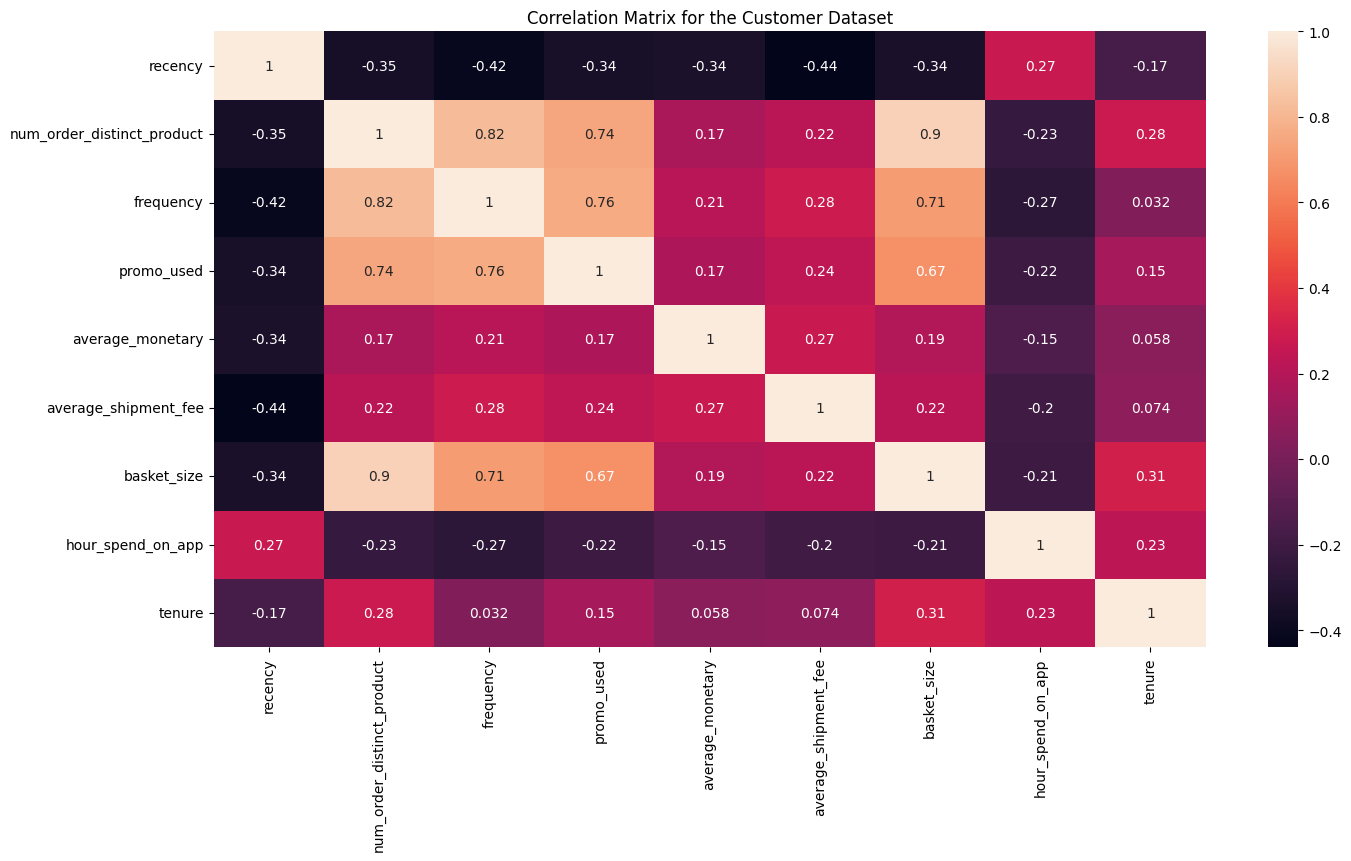

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df_final.drop('customer_id',axis=1).corr(), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

**Distribution of the Tenure of the customers on the platform**

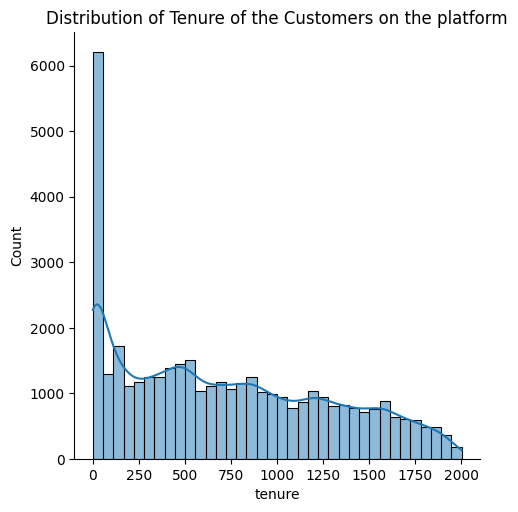

In [ ]:
sns.displot(x='tenure', kde=True, data=df_final)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

**Distribution of Order Count of Customers**

In [ ]:
df_final['frequency'].max()

45.0

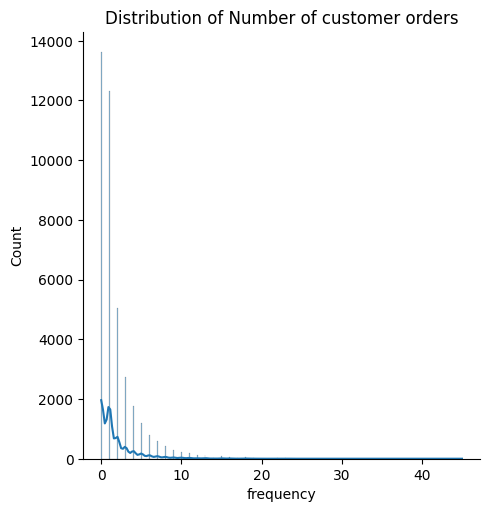

In [ ]:
sns.displot(x='frequency', kde=True, data=df_final)
plt.title("Distribution of Number of customer orders")
plt.show()

**Distribution of Recency of the customers**

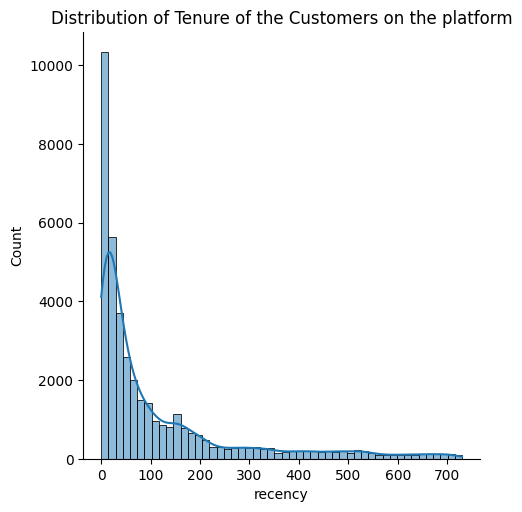

In [ ]:
sns.displot(x='recency',bins=50, kde=True, data=df_final)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

In [ ]:
# df_final['tot_add_promo'].max()

In [ ]:
# sns.displot(x='tot_add_promo',kde=True, data=df_final)
# plt.title('Distribution of Cashback for customers')
# plt.show()

In [ ]:
df_final['customer_id'].nunique()

39756

## Data Preprocessing

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39756 entries, 0 to 39755
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 39756 non-null  int64  
 1   recency                     39756 non-null  int64  
 2   num_order_distinct_product  39756 non-null  int64  
 3   frequency                   39756 non-null  float64
 4   promo_used                  39756 non-null  float64
 5   average_monetary            39756 non-null  float64
 6   average_shipment_fee        39756 non-null  float64
 7   basket_size                 39756 non-null  int64  
 8   hour_spend_on_app           39756 non-null  float64
 9   tenure                      39756 non-null  int64  
 10  customer_type               39756 non-null  object 
 11  customer_status             39756 non-null  object 
 12  is_churn                    39756 non-null  object 
dtypes: float64(5), int64(5), object

In [ ]:
# menghapus kolom yang tidak diikutsertakan
cleaned_df = df_final.drop(['customer_id'], axis=1)
print(cleaned_df)

       recency  num_order_distinct_product  frequency  promo_used  \
0            6                          52       10.0         4.0   
1          259                           1        0.0         0.0   
2          135                           2        0.0         0.0   
3          114                           2        0.0         0.0   
4           79                           7        1.0         0.0   
...        ...                         ...        ...         ...   
39751      396                           2        0.0         0.0   
39752        8                          24        5.0         2.0   
39753       14                          16        2.0         1.0   
39754        0                          49        7.0         0.0   
39755       71                           3        1.0         0.0   

       average_monetary  average_shipment_fee  basket_size  hour_spend_on_app  \
0              650141.0               11000.0           66              57.58   
1        

In [ ]:
# normalisasi data numerik
numeric_columns= ['recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee',
                  'basket_size','hour_spend_on_app','tenure']

numeric_data = cleaned_df[numeric_columns]

# normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)

# mengganti nilai-nilai dalam cleaned df dengan data yang sudah dinormalisasi
cleaned_df[numeric_columns] = normalized_data

In [ ]:
cleaned_df.head(20)

,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type,customer_status,is_churn
0,0.008219,0.184397,0.222222,0.266667,0.047409,0.22000,0.079327,0.005364,0.244134,Existing Customer,Active,No
1,0.354795,0.003546,0.000000,0.000000,0.000000,0.00000,0.003606,0.000025,0.002496,New Customer,Inactive,Yes
2,0.184932,0.007092,0.000000,0.000000,0.000000,0.00000,0.006010,0.023211,0.352471,Existing Customer,Inactive,Yes
3,0.156164,0.007092,0.000000,0.000000,0.000000,0.00000,0.008413,0.156340,0.328008,Existing Customer,Inactive,Yes
4,0.108219,0.024823,0.022222,0.000000,0.007917,0.00000,0.028846,0.051838,0.343984,Existing Customer,Active,Yes
5,0.017808,0.092199,0.088889,0.066667,0.020620,0.15000,0.045673,0.020239,0.695457,Existing Customer,Active,No
6,0.217808,0.003546,0.000000,0.000000,0.000000,0.00000,0.001202,0.000079,0.000499,New Customer,Inactive,Yes
7,0.054795,0.017730,0.044444,0.066667,0.033075,0.25000,0.021635,0.049327,0.101847,Existing Customer,Active,No
8,0.205479,0.014184,0.000000,0.000000,0.000000,0.00000,0.013221,0.049061,0.731403,Existing Customer,Inactive,Yes
9,0.993151,0.003546,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.472292,Existing Customer,Inactive,Yes


In [ ]:
# One-Hot Encoding
cleaned_df = pd.get_dummies(cleaned_df, columns=['customer_type', 'customer_status'])

# label encoder
enc = LabelEncoder()
cleaned_df['is_churn'] = enc.fit_transform(cleaned_df['is_churn'])


In [ ]:
cleaned_df.head(20)

,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,is_churn,customer_type_Existing Customer,customer_type_New Customer,customer_status_Active,customer_status_Inactive
0,0.008219,0.184397,0.222222,0.266667,0.047409,0.22000,0.079327,0.005364,0.244134,0,1,0,1,0
1,0.354795,0.003546,0.000000,0.000000,0.000000,0.00000,0.003606,0.000025,0.002496,1,0,1,0,1
2,0.184932,0.007092,0.000000,0.000000,0.000000,0.00000,0.006010,0.023211,0.352471,1,1,0,0,1
3,0.156164,0.007092,0.000000,0.000000,0.000000,0.00000,0.008413,0.156340,0.328008,1,1,0,0,1
4,0.108219,0.024823,0.022222,0.000000,0.007917,0.00000,0.028846,0.051838,0.343984,1,1,0,1,0
5,0.017808,0.092199,0.088889,0.066667,0.020620,0.15000,0.045673,0.020239,0.695457,0,1,0,1,0
6,0.217808,0.003546,0.000000,0.000000,0.000000,0.00000,0.001202,0.000079,0.000499,1,0,1,0,1
7,0.054795,0.017730,0.044444,0.066667,0.033075,0.25000,0.021635,0.049327,0.101847,0,1,0,1,0
8,0.205479,0.014184,0.000000,0.000000,0.000000,0.00000,0.013221,0.049061,0.731403,1,1,0,0,1
9,0.993151,0.003546,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.472292,1,1,0,0,1


In [ ]:
# splitting dataset 80% training & 20% testing
from sklearn.model_selection import train_test_split
# predictor dan target
X = cleaned_df.drop('is_churn', axis=1)
y = cleaned_df['is_churn']

# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah: ', X_train.shape,
      ', sedangkan jumlah baris dan kolom dari y-train adalah: ', y_train.shape)
print('Persentase churn di data training adalah: ')
print(y_train.value_counts(normalize=True))

print('Jumlah baris dan kolom dari x_test adalah ', X_test.shape,
      ', sedangkan jumlah baris dan kolom dari y-test adalah', y_test.shape)
print('Persentase churn di data testing adalah: ')
print(y_test.value_counts(normalize=True))


Jumlah baris dan kolom dari x_train adalah:  (31804, 13) , sedangkan jumlah baris dan kolom dari y-train adalah:  (31804,)
Persentase churn di data training adalah: 
1    0.614325
0    0.385675
Name: is_churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah  (7952, 13) , sedangkan jumlah baris dan kolom dari y-test adalah (7952,)
Persentase churn di data testing adalah: 
1    0.615191
0    0.384809
Name: is_churn, dtype: float64


In [ ]:
# cross validation
skfcv = StratifiedKFold(n_splits=10)


In [ ]:
# split data menjadi 10 folds
# menggunakan 'kf' (StratiFiedKFold splitting stratergy) objek sebagai input ke cross_val_score() method
# Folds dibuat dengan mempertahankan persentase sampel untuk setiap kelas
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 35780, Test set:3976
Fold:2, Train set: 35780, Test set:3976
Fold:3, Train set: 35780, Test set:3976
Fold:4, Train set: 35780, Test set:3976
Fold:5, Train set: 35780, Test set:3976
Fold:6, Train set: 35780, Test set:3976
Fold:7, Train set: 35781, Test set:3975
Fold:8, Train set: 35781, Test set:3975
Fold:9, Train set: 35781, Test set:3975
Fold:10, Train set: 35781, Test set:3975


## Modelling

### Model : Logistic Regression

In [ ]:
#Build logistic regression pipeline
log_pipe = Pipeline([('imputer',IterativeImputer(random_state=42)),('scaler',StandardScaler()),
                    ('logreg',LogisticRegression())])

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.9673417192089572


**Classification Report using splitting dataset**

In [ ]:
# pembuatan model
log_model = LogisticRegression().fit(X_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


In [ ]:
# performansi model training - menampilkan metrics
# predict
y_train_pred = log_model.predict(X_train)
#print classification report
print('Classification Report Training Model (Logistic Regression')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12266
           1       0.95      0.94      0.94     19538

    accuracy                           0.93     31804
   macro avg       0.93      0.93      0.93     31804
weighted avg       0.93      0.93      0.93     31804



In [ ]:
#performansi  data testing - menampilkan metrics
# Predict
y_test_pred = log_model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3060
           1       0.95      0.94      0.95      4892

    accuracy                           0.93      7952
   macro avg       0.93      0.93      0.93      7952
weighted avg       0.93      0.93      0.93      7952



In [ ]:
import time

start_time = time.time()

# pembuatan model
log_model = LogisticRegression().fit(X_train, y_train)

# Predict
y_test_pred = log_model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

end_time = time.time()

elapsed_time = end_time - start_time
print("Waktu yang diperlukan:", elapsed_time, "detik")


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3060
           1       0.95      0.94      0.95      4892

    accuracy                           0.93      7952
   macro avg       0.93      0.93      0.93      7952
weighted avg       0.93      0.93      0.93      7952

Waktu yang diperlukan: 0.9378750324249268 detik


**Confusion Matrix using splitting dataset**

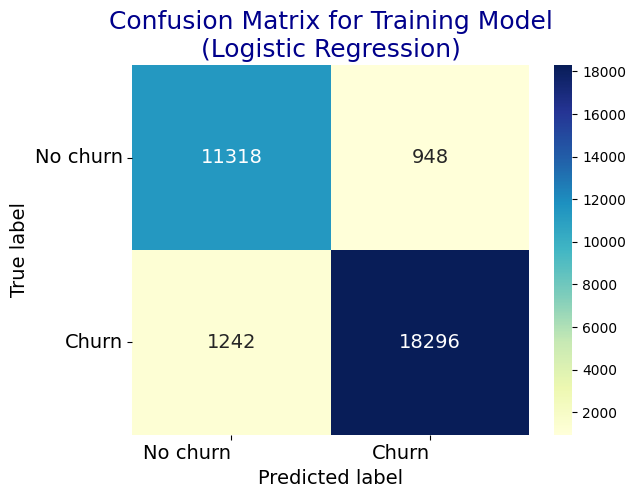

In [ ]:
# performansi model training - menampilkan plots
# form confusion matrix as dataframe
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

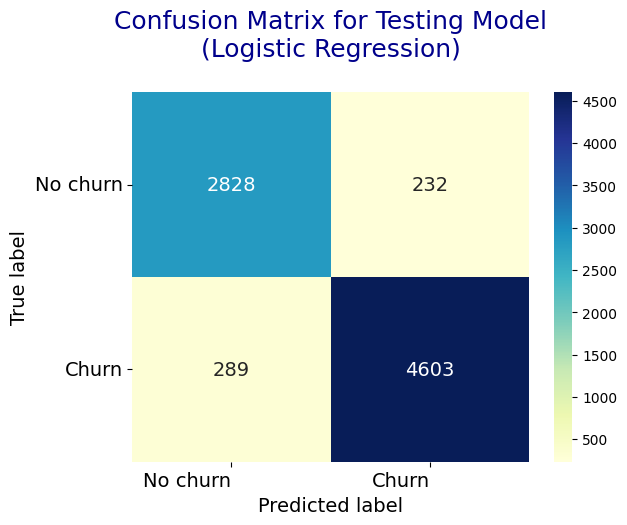

In [ ]:
# performansi data testing - menampilkan plots
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)),('No churn','Churn'),('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Resampling Using SMOTE dan ROC AUC Score**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

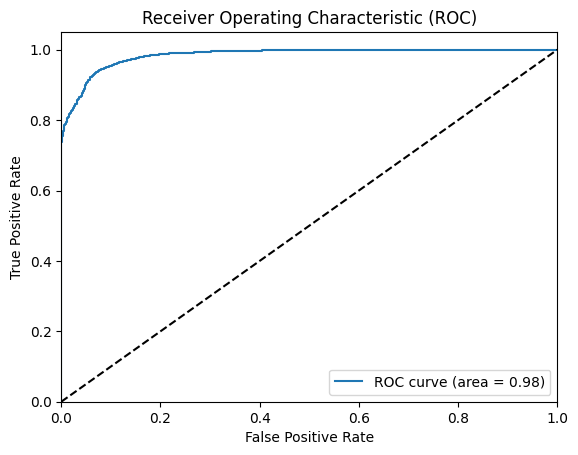

In [ ]:
# Memprediksi probabilitas kelas positif pada data uji
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Menghitung skor ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Menampilkan kurva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.9844033075208825

**KFold Cross Validation Score**

In [ ]:
# Logistic Regression using KFold Cross Validation
score = cross_val_score(log_model, X, y, cv= 10, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.9333501  0.92982897 0.93838028 0.92404427 0.93083501 0.93259557
 0.92981132 0.93786164 0.9363522  0.93534591]
Average score: 0.93


### Model : Random Forest Classifier

**KFold Cross Validation Score**

In [ ]:
# Build Random Forest
score = cross_val_score(RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.97208249 0.97962777 0.97811871 0.97208249 0.97761569 0.9778672
 0.97509434 0.97735849 0.97786164 0.97383648]
Average score: 0.98


In [ ]:
#Build Random Forest pipeline
rf_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('rfmodel',RandomForestClassifier())])

#cross validate Random Forest model
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(rf_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Random Forest: 0.9798304460477965


**Classification Report using splitting dataset**

In [ ]:
# pembuatan model
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
print(rf_model)

RandomForestClassifier(random_state=42)


In [ ]:
# performansi data training
y_train_pred = rf_model.predict(X_train)
print('Classification Report Training Model (Random Forest): ')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12266
           1       1.00      1.00      1.00     19538

    accuracy                           1.00     31804
   macro avg       1.00      1.00      1.00     31804
weighted avg       1.00      1.00      1.00     31804



In [ ]:
# performansi data testing
y_test_pred = rf_model.predict(X_test)
print('Classification Report Testing Model (Random Forest): ')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest): 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3060
           1       0.98      0.98      0.98      4892

    accuracy                           0.98      7952
   macro avg       0.98      0.98      0.98      7952
weighted avg       0.98      0.98      0.98      7952



Dapat dilihat bahwa model random forest yang terbentuk mengalami overfitting dikarenakan prediksi pada data training terlalu baik dibandingkan dengan data tesnya. Oleh karena itu perlu dilakukan pengaturan parameter melalui hyperparameter tuning menggunakan grid search cv untuk penanganan overfitting

**Hyperparameter Tuning Random Forest**

In [ ]:
RF1_parameters = {'n_estimators':[50,100,200]}
grid_obj =GridSearchCV(rf_model,RF1_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitRF = grid_obj.fit(X_train, y_train)
grid_fitRF.cv_results_, grid_fitRF.best_params_, grid_fitRF.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


({'mean_fit_time': array([ 2.44020228,  5.27314415, 10.65822277]),
  'std_fit_time': array([0.30433709, 1.14137214, 1.45537616]),
  'mean_score_time': array([0.0703433 , 0.14803591, 0.30431657]),
  'std_score_time': array([0.01266836, 0.03656643, 0.11038278]),
  'param_n_estimators': masked_array(data=[50, 100, 200],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 50},
   {'n_estimators': 100},
   {'n_estimators': 200}],
  'split0_test_score': array([0.99462709, 0.9949103 , 0.9951737 ]),
  'split1_test_score': array([0.99513854, 0.99582916, 0.99604035]),
  'split2_test_score': array([0.99553838, 0.99572067, 0.99598835]),
  'split3_test_score': array([0.99580309, 0.99610488, 0.99626285]),
  'split4_test_score': array([0.99614363, 0.99631375, 0.99645644]),
  'mean_test_score': array([0.99545015, 0.99577576, 0.99598434]),
  'std_test_score': array([0.00052684, 0.00048014, 0.00043835]),
  'rank_test_score': arra

In [ ]:
RF2_parameters = {'max_features':['auto','sqrt','log2']}
grid_obj =GridSearchCV(rf_model,RF2_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitRF = grid_obj.fit(X_train, y_train)
grid_fitRF.cv_results_, grid_fitRF.best_params_, grid_fitRF.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


({'mean_fit_time': array([0.00649357, 5.28114104, 5.8762887 ]),
  'std_fit_time': array([1.62583321e-03, 1.22504937e+00, 2.09818477e+00]),
  'mean_score_time': array([0.        , 0.1817729 , 0.12179933]),
  'std_score_time': array([0.        , 0.06897187, 0.01591005]),
  'param_max_features': masked_array(data=['auto', 'sqrt', 'log2'],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 'auto'},
   {'max_features': 'sqrt'},
   {'max_features': 'log2'}],
  'split0_test_score': array([      nan, 0.9949103, 0.9949103]),
  'split1_test_score': array([       nan, 0.99582916, 0.99582916]),
  'split2_test_score': array([       nan, 0.99572067, 0.99572067]),
  'split3_test_score': array([       nan, 0.99610488, 0.99610488]),
  'split4_test_score': array([       nan, 0.99631375, 0.99631375]),
  'mean_test_score': array([       nan, 0.99577576, 0.99577576]),
  'std_test_score': array([       nan, 0.00048014, 0.00048014]),

In [ ]:
RF3_parameters = {'max_depth':[1,2,3,4,5]}
grid_obj =GridSearchCV(rf_model,RF3_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitRF = grid_obj.fit(X_train, y_train)
grid_fitRF.cv_results_, grid_fitRF.best_params_, grid_fitRF.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'mean_fit_time': array([1.81116023, 3.06473813, 4.41630611, 2.38810058, 3.29045987]),
  'std_fit_time': array([0.65587235, 0.57818472, 1.27932881, 0.61014532, 0.87036287]),
  'mean_score_time': array([0.11241188, 0.13155055, 0.21123857, 0.08199873, 0.14090452]),
  'std_score_time': array([0.03809634, 0.01146183, 0.08658186, 0.00503073, 0.04017588]),
  'param_max_depth': masked_array(data=[1, 2, 3, 4, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 1},
   {'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5}],
  'split0_test_score': array([0.96934164, 0.98189614, 0.98587154, 0.98815401, 0.99072116]),
  'split1_test_score': array([0.96782223, 0.98246069, 0.98627352, 0.98831904, 0.99161383]),
  'split2_test_score': array([0.97120763, 0.98444539, 0.98807843, 0.98990964, 0.99258021]),
  'split3_test_score': array([0.97005177, 0.98371421, 0.98707495, 0.98911484, 0.9922531

In [ ]:
RF4_parameters = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
grid_obj =GridSearchCV(rf_model,RF4_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitRF = grid_obj.fit(X_train, y_train)
grid_fitRF.cv_results_, grid_fitRF.best_params_, grid_fitRF.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'mean_fit_time': array([5.29653454, 5.18142638, 4.53428583, 4.57998199, 4.97630129,
         4.90782604, 5.24288769, 4.21618319, 4.66785154, 4.84026203]),
  'std_fit_time': array([1.30127693, 1.36575212, 0.99472926, 1.02986115, 0.75605614,
         0.55331747, 1.13603195, 0.35365234, 1.04088096, 1.33296882]),
  'mean_score_time': array([0.12976451, 0.12723866, 0.14129539, 0.14362969, 0.16299634,
         0.16074743, 0.22078338, 0.16502147, 0.11191773, 0.10914073]),
  'std_score_time': array([0.00840967, 0.01200329, 0.04775288, 0.04337747, 0.05448696,
         0.05339355, 0.09375218, 0.05244385, 0.00082573, 0.01125086]),
  'param_min_samples_leaf': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 1},
   {'min_samples_leaf': 2},
   {'min_samples_leaf': 3},
   {'min_samples_leaf': 4},
  

In [ ]:
RF5_parameters = {'criterion':['entropy','gini']}
grid_obj =GridSearchCV(rf_model,RF5_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitRF = grid_obj.fit(X_train, y_train)
grid_fitRF.cv_results_, grid_fitRF.best_params_, grid_fitRF.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


({'mean_fit_time': array([5.52005329, 5.51389709]),
  'std_fit_time': array([1.0186283 , 0.89813506]),
  'mean_score_time': array([0.15669465, 0.17442212]),
  'std_score_time': array([0.04874613, 0.05393967]),
  'param_criterion': masked_array(data=['entropy', 'gini'],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'criterion': 'entropy'}, {'criterion': 'gini'}],
  'split0_test_score': array([0.99549129, 0.9949103 ]),
  'split1_test_score': array([0.99577972, 0.99582916]),
  'split2_test_score': array([0.99586082, 0.99572067]),
  'split3_test_score': array([0.99612037, 0.99610488]),
  'split4_test_score': array([0.99643443, 0.99631375]),
  'mean_test_score': array([0.99593732, 0.99577576]),
  'std_test_score': array([0.00031946, 0.00048014]),
  'rank_test_score': array([1, 2], dtype=int32)},
 {'criterion': 'entropy'},
 0.9959373247685889)

In [ ]:
# performansi data training setelah parameter diatur untuk mengurangi overfitting
rf_grid = RandomForestClassifier(n_estimators=200,
                                 criterion='entropy',
                                 max_depth=5,
                                 max_features='sqrt',
                                 min_samples_split=2)
rf_grid.fit(X_train, y_train)
y_train_pred = rf_grid.predict(X_train)
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred))

Classification Report Testing Model (Random Forest): 
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3060
           1       0.95      0.98      0.96      4892

    accuracy                           0.96      7952
   macro avg       0.96      0.95      0.95      7952
weighted avg       0.96      0.96      0.96      7952



In [ ]:
# performansi data testing setelah parameter diatur untuk mengurangi overfitting
y_test_pred = rf_grid.predict(X_test)
print('Classification Report Testing Model (Random Forest): ')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest): 
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3060
           1       0.95      0.98      0.97      4892

    accuracy                           0.96      7952
   macro avg       0.96      0.95      0.95      7952
weighted avg       0.96      0.96      0.96      7952



In [ ]:
import time

start_time = time.time()
# performansi data training setelah parameter diatur untuk mengurangi overfitting
rf_grid = RandomForestClassifier(n_estimators=200,
                                 criterion='entropy',
                                 max_depth=5,
                                 max_features='sqrt',
                                 min_samples_split=2)
rf_grid.fit(X_train, y_train)

# performansi data testing setelah parameter diatur untuk mengurangi overfitting
y_test_pred = rf_grid.predict(X_test)
print('Classification Report Testing Model (Random Forest): ')
print(classification_report(y_test, y_test_pred))

end_time = time.time()

elapsed_time = end_time - start_time
print("Waktu yang diperlukan:", elapsed_time, "detik")


Classification Report Testing Model (Random Forest): 
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3060
           1       0.95      0.98      0.97      4892

    accuracy                           0.96      7952
   macro avg       0.96      0.95      0.95      7952
weighted avg       0.96      0.96      0.96      7952

Waktu yang diperlukan: 5.498231887817383 detik


**Confusion Matrix using splitting dataset**

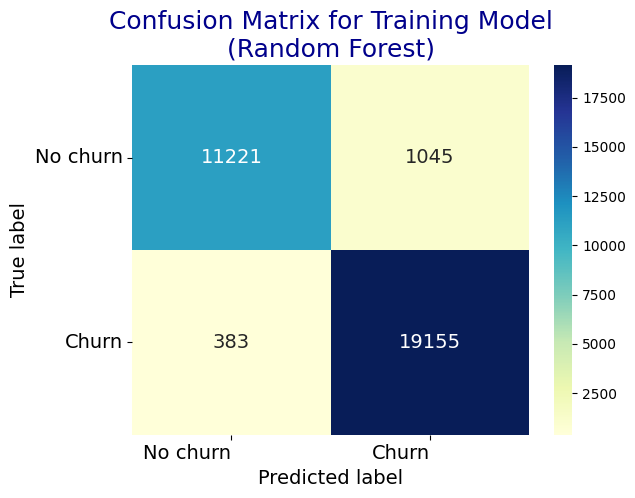

In [ ]:
# performansi model training - menampilkan plots
# form confusion matrix as dataframe
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

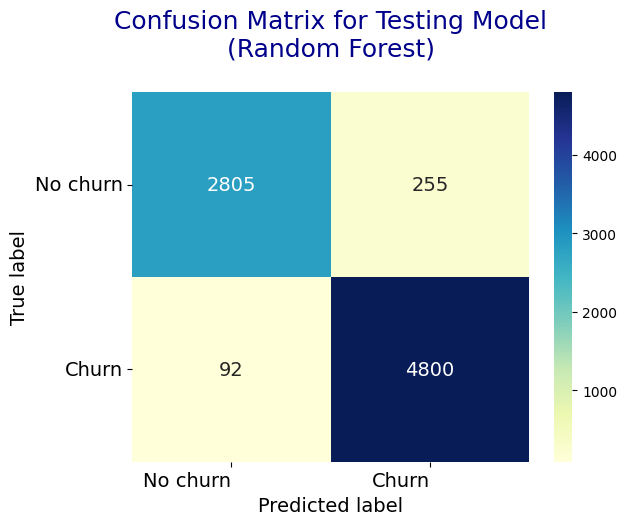

In [ ]:
# performansi data testing - menampilkan plots
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)),('No churn','Churn'),('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**ROC_AUC Score**

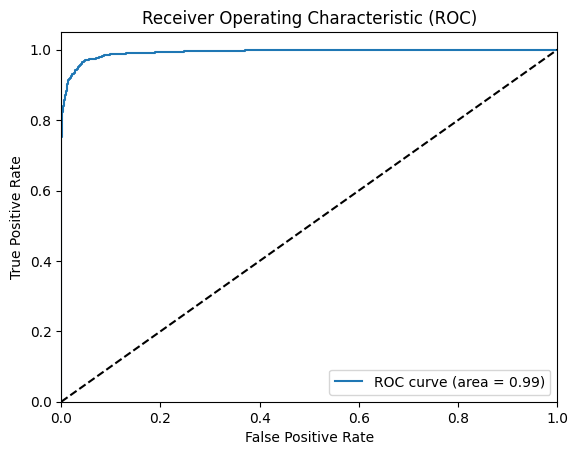

In [ ]:
# Memprediksi probabilitas kelas positif pada data uji
y_pred_proba = rf_grid.predict_proba(X_test)[:, 1]

# Menghitung skor ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Menampilkan kurva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.9927912184225012

### Model : XGboost

**KFold Cross Validation Score**

In [ ]:
# Build XGBoost
score = cross_val_score(XGBClassifier(), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.97384306 0.97761569 0.97887324 0.97183099 0.9751006  0.97811871
 0.97484277 0.97836478 0.97534591 0.97283019]
Average score: 0.98


In [ ]:
#Build XGBoost pipeline
xgb_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('xgb',XGBClassifier(verbosity=0,use_label_encoder=False))])

#cross validate XGBoost model
print(f"Cross validation score for XGBoost: {np.mean(cross_val_score(xgb_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for XGBoost: 0.9791644061128075


**Classification Report using splitting dataset**

In [ ]:
# pembuatan model
xgb_model = XGBClassifier().fit(X_train, y_train)
print('Model XGboost yang terbentuk adalah: \n', xgb_model)

Model XGboost yang terbentuk adalah: 
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [ ]:
# performansi model training - menampilkan metrics
y_train_pred = xgb_model.predict(X_train)
print('Classification Report Training Model (XGboost): ')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (XGboost): 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12266
           1       1.00      0.99      0.99     19538

    accuracy                           0.99     31804
   macro avg       0.99      0.99      0.99     31804
weighted avg       0.99      0.99      0.99     31804



In [ ]:
# performansi model testing - menampilkan metrics
y_test_pred = xgb_model.predict(X_test)
print('Classification Report Testing Model (XGboost): ')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (XGboost): 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3060
           1       0.99      0.98      0.98      4892

    accuracy                           0.98      7952
   macro avg       0.98      0.98      0.98      7952
weighted avg       0.98      0.98      0.98      7952



**Hyperparameter Tuning XGBoost**

In [ ]:
XGB1_parameters = {'n_estimators':[50,100,200]}
grid_obj =GridSearchCV(xgb_model,XGB1_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitXGB = grid_obj.fit(X_train, y_train)
grid_fitXGB.cv_results_, grid_fitXGB.best_params_, grid_fitXGB.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


({'mean_fit_time': array([ 2.56850829,  6.00409641, 11.237887  ]),
  'std_fit_time': array([0.04723016, 1.07528395, 1.92527387]),
  'mean_score_time': array([0.02244172, 0.04213381, 0.06444316]),
  'std_score_time': array([0.00033863, 0.01550853, 0.02231629]),
  'param_n_estimators': masked_array(data=[50, 100, 200],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 50},
   {'n_estimators': 100},
   {'n_estimators': 200}],
  'split0_test_score': array([0.99624163, 0.99606022, 0.99586233]),
  'split1_test_score': array([0.99654289, 0.99638652, 0.99617591]),
  'split2_test_score': array([0.99678928, 0.99664491, 0.99640196]),
  'split3_test_score': array([0.99638018, 0.99612924, 0.99610269]),
  'split4_test_score': array([0.99666012, 0.99670133, 0.99658259]),
  'mean_test_score': array([0.99652282, 0.99638444, 0.9962251 ]),
  'std_test_score': array([0.00019477, 0.0002602 , 0.00024823]),
  'rank_test_score': arra

In [ ]:
XGB2_parameters = {'max_depth':[1,2,3,4,5]}
grid_obj =GridSearchCV(xgb_model,XGB2_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitXGB = grid_obj.fit(X_train, y_train)
grid_fitXGB.cv_results_, grid_fitXGB.best_params_, grid_fitXGB.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'mean_fit_time': array([1.19298458, 2.59698563, 2.47780557, 4.31111369, 4.85031223]),
  'std_fit_time': array([0.33662585, 0.64180565, 0.01393901, 0.9982925 , 0.84261685]),
  'mean_score_time': array([0.01915002, 0.02371626, 0.021842  , 0.03774629, 0.03804555]),
  'std_score_time': array([0.00777757, 0.00825908, 0.00209759, 0.01517372, 0.01466902]),
  'param_max_depth': masked_array(data=[1, 2, 3, 4, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 1},
   {'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5}],
  'split0_test_score': array([0.99171064, 0.99578952, 0.99615124, 0.9963523 , 0.99627323]),
  'split1_test_score': array([0.99233382, 0.9959799 , 0.99629128, 0.99640738, 0.996531  ]),
  'split2_test_score': array([0.9927262 , 0.99640811, 0.99697694, 0.99684937, 0.996751  ]),
  'split3_test_score': array([0.99217222, 0.99622118, 0.99651666, 0.99655228, 0.9962129

In [ ]:
XGB3_parameters = {'min_weight_child':[0,1,2,3,4,5,6,7]}
grid_obj =GridSearchCV(xgb_model,XGB3_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitXGB = grid_obj.fit(X_train, y_train)
grid_fitXGB.cv_results_, grid_fitXGB.best_params_, grid_fitXGB.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[14:53:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_weight_child" } are not used.



({'mean_fit_time': array([6.08311033, 6.00437946, 5.92900014, 6.27398844, 5.76754966,
         6.38532419, 5.57376394, 6.26059036]),
  'std_fit_time': array([1.27482319, 1.13952321, 0.85058162, 1.27513516, 0.74435287,
         1.17282691, 0.96061361, 1.00201605]),
  'mean_score_time': array([0.03586593, 0.04120598, 0.04961758, 0.03453622, 0.04654241,
         0.03386426, 0.04768672, 0.04117818]),
  'std_score_time': array([0.00263809, 0.01224196, 0.01843424, 0.00091831, 0.01635577,
         0.00057009, 0.01717414, 0.01415015]),
  'param_min_weight_child': masked_array(data=[0, 1, 2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_weight_child': 0},
   {'min_weight_child': 1},
   {'min_weight_child': 2},
   {'min_weight_child': 3},
   {'min_weight_child': 4},
   {'min_weight_child': 5},
   {'min_weight_child': 6},
   {'min_weight_child': 7}],
  'split0_test_score': arra

In [ ]:
XGB4_parameters = {'learning_rate':[0.025,0.05,0.1,0.2,0.3]}
grid_obj =GridSearchCV(xgb_model,XGB4_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitXGB = grid_obj.fit(X_train, y_train)
grid_fitXGB.cv_results_, grid_fitXGB.best_params_, grid_fitXGB.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'mean_fit_time': array([ 9.45037856, 10.87747674,  7.88557787,  5.90270395,  5.66608458]),
  'std_fit_time': array([3.68661713, 3.87524569, 2.91443995, 0.82574066, 1.446729  ]),
  'mean_score_time': array([0.03740735, 0.06831098, 0.05102811, 0.04004164, 0.04196014]),
  'std_score_time': array([0.00998086, 0.01459205, 0.03111886, 0.01317378, 0.01486747]),
  'param_learning_rate': masked_array(data=[0.025, 0.05, 0.1, 0.2, 0.3],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.025},
   {'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.2},
   {'learning_rate': 0.3}],
  'split0_test_score': array([0.99561354, 0.99600306, 0.99633238, 0.9965094 , 0.99606022]),
  'split1_test_score': array([0.99621257, 0.99636925, 0.99669404, 0.99654539, 0.99638652]),
  'split2_test_score': array([0.99613903, 0.99652515, 0.99691696, 0.99667078, 0.99664491]),
  'split3_test_score': array([0.

In [ ]:
XGB5_parameters = {'gamma':[0,0.1,0.2,0.3,0.4,1.0,1.5,2.0]}
grid_obj =GridSearchCV(xgb_model,XGB5_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitXGB = grid_obj.fit(X_train, y_train)
grid_fitXGB.cv_results_, grid_fitXGB.best_params_, grid_fitXGB.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


({'mean_fit_time': array([5.51621261, 7.17434874, 6.34112115, 6.09445901, 5.87520385,
         5.55240316, 5.94512463, 5.4548049 ]),
  'std_fit_time': array([1.0184627 , 1.91963033, 1.16099   , 1.01813206, 0.96327868,
         0.95560994, 1.06054787, 0.66875792]),
  'mean_score_time': array([0.04475737, 0.04436121, 0.03602643, 0.04646015, 0.03321629,
         0.04462347, 0.03273864, 0.02979827]),
  'std_score_time': array([0.01473801, 0.01432485, 0.00320565, 0.01580613, 0.00078547,
         0.01678802, 0.01190347, 0.01409691]),
  'param_gamma': masked_array(data=[0, 0.1, 0.2, 0.3, 0.4, 1.0, 1.5, 2.0],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 1.0},
   {'gamma': 1.5},
   {'gamma': 2.0}],
  'split0_test_score': array([0.99606022, 0.99611473, 0.99615004, 0.99625884, 0.9961539 ,
        

In [ ]:
XGB6_parameters = {'colsample_bylevel':['log2','sqrt',  0.25]}
grid_obj =GridSearchCV(xgb_model,XGB6_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitXGB = grid_obj.fit(X_train, y_train)
grid_fitXGB.cv_results_, grid_fitXGB.best_params_, grid_fitXGB.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


({'mean_fit_time': array([0.02857242, 0.02786503, 1.86156993]),
  'std_fit_time': array([0.00395196, 0.00460634, 0.31186071]),
  'mean_score_time': array([0.        , 0.        , 0.03167272]),
  'std_score_time': array([0.        , 0.        , 0.00408398]),
  'param_colsample_bylevel': masked_array(data=['log2', 'sqrt', 0.25],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bylevel': 'log2'},
   {'colsample_bylevel': 'sqrt'},
   {'colsample_bylevel': 0.25}],
  'split0_test_score': array([       nan,        nan, 0.99598198]),
  'split1_test_score': array([       nan,        nan, 0.99597353]),
  'split2_test_score': array([       nan,        nan, 0.99674954]),
  'split3_test_score': array([       nan,        nan, 0.99630884]),
  'split4_test_score': array([       nan,        nan, 0.99670185]),
  'mean_test_score': array([       nan,        nan, 0.99634315]),
  'std_test_score': array([       nan,        nan, 0.0003

In [ ]:
XGB7_parameters = {'subsample':[0.15,0.5,0.75,1.0]}
grid_obj =GridSearchCV(xgb_model,XGB7_parameters, n_jobs=-1, cv=5, verbose=3,scoring='roc_auc')
grid_fitXGB = grid_obj.fit(X_train, y_train)
grid_fitXGB.cv_results_, grid_fitXGB.best_params_, grid_fitXGB.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


({'mean_fit_time': array([4.2642786 , 6.17432113, 6.29245024, 5.83614573]),
  'std_fit_time': array([0.69705135, 1.02322046, 1.07295868, 0.96362904]),
  'mean_score_time': array([0.05073009, 0.04120026, 0.04207458, 0.03876286]),
  'std_score_time': array([0.01731482, 0.01119809, 0.01513028, 0.01568344]),
  'param_subsample': masked_array(data=[0.15, 0.5, 0.75, 1.0],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.15},
   {'subsample': 0.5},
   {'subsample': 0.75},
   {'subsample': 1.0}],
  'split0_test_score': array([0.9943676 , 0.99574342, 0.99580334, 0.99606022]),
  'split1_test_score': array([0.99476275, 0.99576324, 0.99598292, 0.99638652]),
  'split2_test_score': array([0.99518601, 0.99618039, 0.99650252, 0.99664491]),
  'split3_test_score': array([0.99415245, 0.99553275, 0.99629059, 0.99612924]),
  'split4_test_score': array([0.99540342, 0.99608624, 0.9964194 , 0.99670133]),
  'mean_test_score': a

In [ ]:
# performansi data training setelah parameter diatur untuk mengurangi overfitting
xgb_grid = XGBClassifier(n_estimators=50,
                         max_depth=4,
                         min_child_weight=0,
                         learning_rate=0.1,
                         gamma=1.5,
                         colsample_bylevel=0.25,
                         subsample=1.0)

xgb_grid.fit(X_train, y_train)

y_train_pred = xgb_grid.predict(X_train)
print('Classification Report Training Model (XGBoost):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12266
           1       0.98      0.97      0.98     19538

    accuracy                           0.97     31804
   macro avg       0.97      0.97      0.97     31804
weighted avg       0.97      0.97      0.97     31804



In [ ]:
# # performansi data testing setelah parameter diatur untuk mengurangi overfitting
y_test_pred = xgb_grid.predict(X_test)
print('Classification Report Testing Model (XGboost): ')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (XGboost): 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3060
           1       0.97      0.98      0.98      4892

    accuracy                           0.97      7952
   macro avg       0.97      0.97      0.97      7952
weighted avg       0.97      0.97      0.97      7952



In [ ]:
import time

start_time = time.time()
# performansi data training setelah parameter diatur untuk mengurangi overfitting
xgb_grid = XGBClassifier(n_estimators=50,
                         max_depth=4,
                         min_child_weight=0,
                         learning_rate=0.1,
                         gamma=1.5,
                         colsample_bylevel=0.25,
                         subsample=1.0)

xgb_grid.fit(X_train, y_train)

# # performansi data testing setelah parameter diatur untuk mengurangi overfitting
y_test_pred = xgb_grid.predict(X_test)
print('Classification Report Testing Model (XGboost): ')
print(classification_report(y_test, y_test_pred))

end_time = time.time()

elapsed_time = end_time - start_time
print("Waktu yang diperlukan:", elapsed_time, "detik")


Classification Report Testing Model (XGboost): 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3060
           1       0.97      0.98      0.98      4892

    accuracy                           0.97      7952
   macro avg       0.97      0.97      0.97      7952
weighted avg       0.97      0.97      0.97      7952

Waktu yang diperlukan: 2.4715051651000977 detik


**Confusion Matrix using splitting dataset**

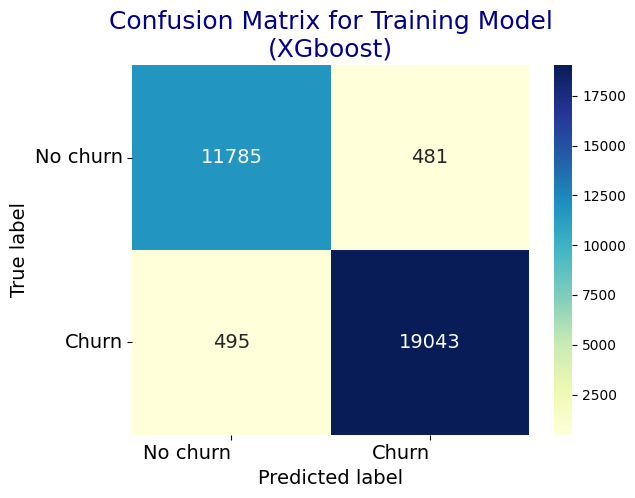

In [ ]:
# performansi model training - menampilkan plots
# form confusion matrix as dataframe
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGboost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

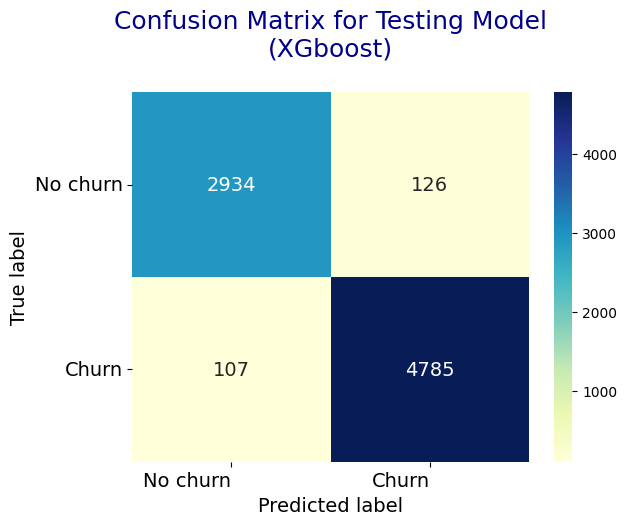

In [ ]:
# performansi data testing - menampilkan plots
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)),('No churn','Churn'),('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(XGboost)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**ROC AUC SCORE**

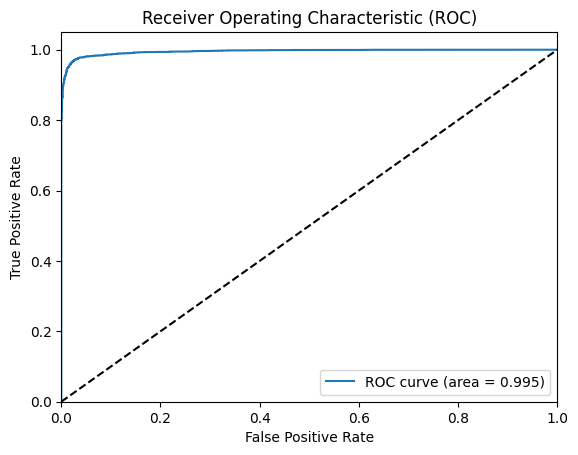

In [ ]:
# Memprediksi probabilitas kelas positif pada data uji
y_pred_proba = xgb_grid.predict_proba(X_test)[:, 1]

# Menghitung skor ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Menampilkan kurva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.9951057548939445

## Feature Important

**Feature Important pada Logistic Regression**

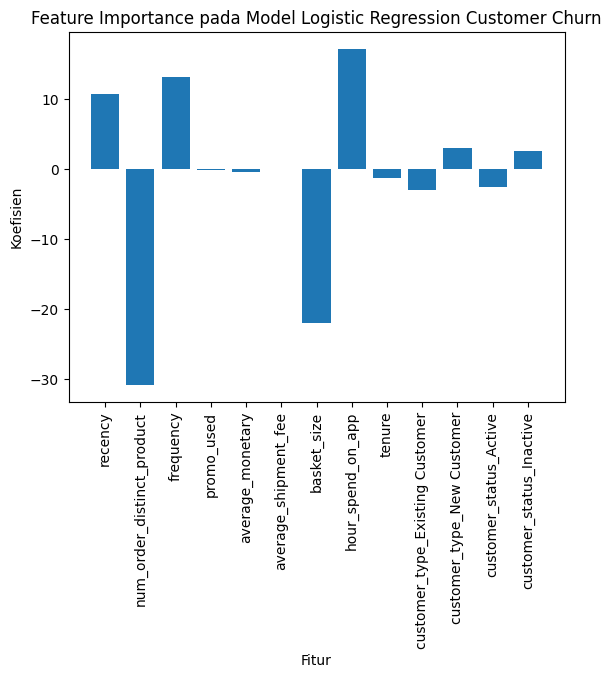

In [ ]:
# Mengambil koefisien dari model
coefficients = log_model.coef_[0]

# Menampilkan "feature importance"
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X.columns, rotation=90)
plt.xlabel('Fitur')
plt.ylabel('Koefisien')
plt.title('Feature Importance pada Model Logistic Regression Customer Churn')
plt.show()

In [ ]:
coefficients

array([ 10.71423266, -30.80391357,  13.11450839,  -0.16466918,
        -0.38764564,  -0.05758646, -22.01807853,  17.17396109,
        -1.30458761,  -3.00217135,   3.01763987,  -2.61581522,
         2.63128374])

**Feature Important pada Random Forest**

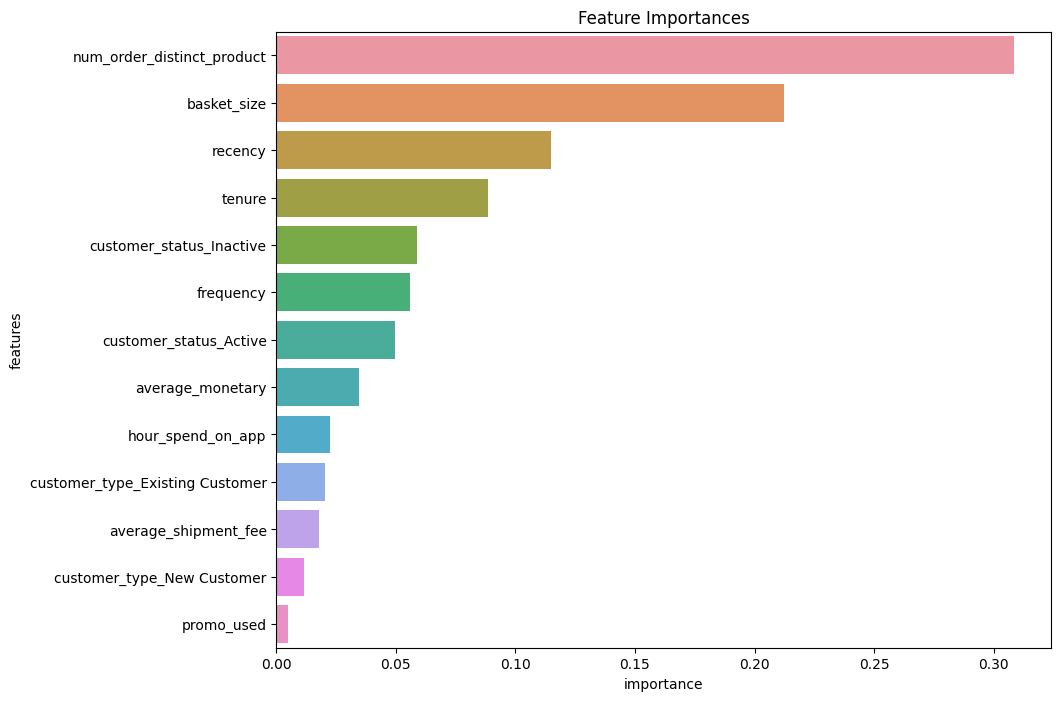

In [ ]:
feature_importance_rf = pd.DataFrame({'importance': rf_grid.feature_importances_, 'features': X_train.columns})

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='features', data=feature_importance_rf.sort_values(by='importance', ascending=False))
plt.title('Feature Importances')
plt.show()


In [ ]:
feature_importance_rf

,importance,features
0,0.114769,recency
1,0.308747,num_order_distinct_product
2,0.055809,frequency
3,0.004772,promo_used
4,0.034587,average_monetary
5,0.017832,average_shipment_fee
6,0.212253,basket_size
7,0.022538,hour_spend_on_app
8,0.088359,tenure
9,0.020216,customer_type_Existing Customer


**Feature Important pada XGBoost**

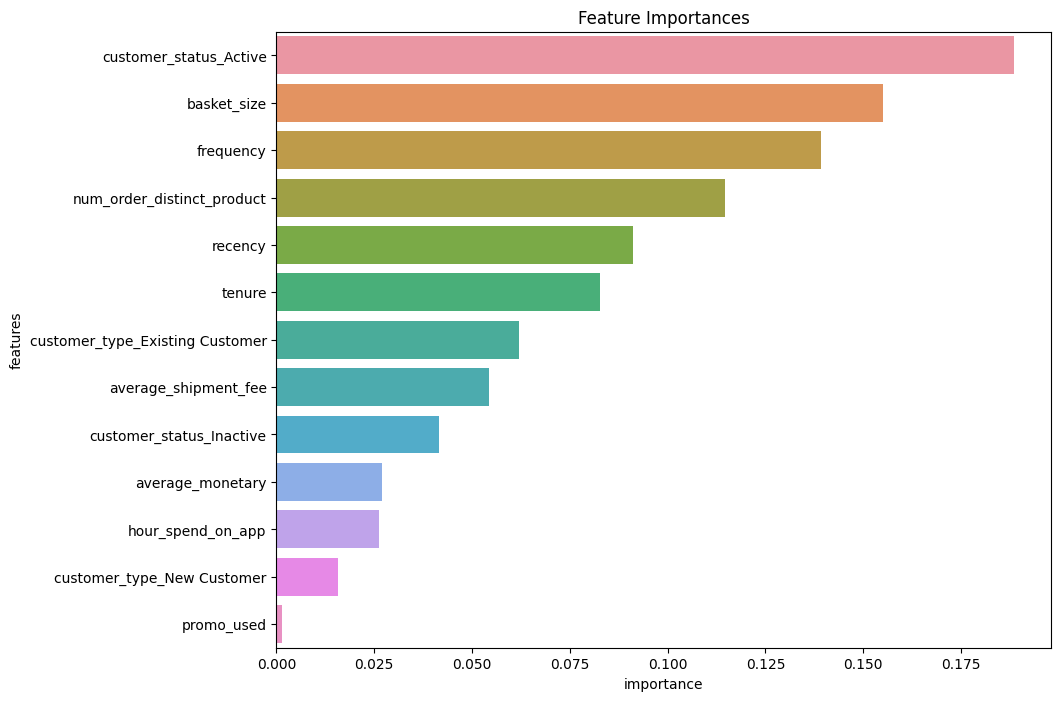

In [ ]:
feature_importance = pd.DataFrame({'importance': xgb_grid.feature_importances_, 'features': X_train.columns})

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='features', data=feature_importance.sort_values(by='importance', ascending=False))
plt.title('Feature Importances')
plt.show()


In [ ]:
feature_importance

,importance,features
0,0.091204,recency
1,0.114788,num_order_distinct_product
2,0.139277,frequency
3,0.001462,promo_used
4,0.026878,average_monetary
5,0.054343,average_shipment_fee
6,0.154996,basket_size
7,0.026267,hour_spend_on_app
8,0.082716,tenure
9,0.062069,customer_type_Existing Customer


In [ ]:
# menyimpan model
import joblib

In [ ]:
# simpan model ke file
joblib.dump(xgb_grid, 'model_churn_xgb_grid.pkl')

# simpan model ke file
joblib.dump(rf_grid, 'model_churn_rf_grid.pkl')

# simpan model ke file
joblib.dump(log_model, 'model_churn_log.pkl')

['model_churn_log.pkl']

In [ ]:
# load model dari file
loaded_model_xgb = joblib.load('/content/drive/MyDrive/Final Project: Churn Customer Prediction/Last Project/model/model_churn_xgb_grid.pkl')

# load model dari file
loaded_model_rf = joblib.load('/content/drive/MyDrive/Final Project: Churn Customer Prediction/Last Project/model/model_churn_rf_grid.pkl')

## Prediction XGB

In [ ]:
prediksi = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/Last Project/data_fix/fix_feature_prediction_jan22_jul22.csv')

# menghapus kolom tidak berguna
prediksi.drop('Unnamed: 0', axis=1, inplace=True)
prediksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434 entries, 0 to 32433
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32434 non-null  int64  
 1   recency                     32434 non-null  int64  
 2   num_order_distinct_product  32434 non-null  int64  
 3   frequency                   32434 non-null  float64
 4   promo_used                  32434 non-null  float64
 5   average_monetary            32434 non-null  float64
 6   average_shipment_fee        32434 non-null  float64
 7   basket_size                 32434 non-null  int64  
 8   hour_spend_on_app           32434 non-null  float64
 9   tenure                      32434 non-null  int64  
 10  customer_type               32434 non-null  object 
 11  customer_status             32434 non-null  object 
 12  is_churn                    32434 non-null  object 
dtypes: float64(5), int64(5), object

In [ ]:
prediksi.head(10)

,customer_id,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type,customer_status,is_churn
0,7279,2,27,29.0,8.0,578201.0,8275.0,39,72.20,705,Existing Customer,Active,No
1,96453,100,1,0.0,0.0,0.0,0.0,4,492.40,103,Existing Customer,Inactive,No
2,22199,96,2,2.0,0.0,222578.0,5000.0,4,1012.56,885,Existing Customer,Inactive,No
3,94370,9,9,10.0,5.0,311858.0,5500.0,13,194.59,1609,Existing Customer,Active,No
4,73093,185,1,1.0,0.0,212718.0,0.0,1,577.49,187,Existing Customer,Inactive,No
5,72106,48,4,5.0,3.0,456430.0,17000.0,8,252.34,409,Existing Customer,Active,No
6,97883,179,1,1.0,1.0,910226.0,10000.0,3,264.71,1648,Existing Customer,Inactive,No
7,31163,111,1,3.0,0.0,618555.0,11666.0,1,370.91,764,Existing Customer,Inactive,No
8,6487,177,1,1.0,0.0,5991926.0,10000.0,2,192.61,355,Existing Customer,Inactive,No
9,9753,35,5,6.0,0.0,247097.0,6666.0,9,341.16,575,Existing Customer,Active,No


In [ ]:
#Handle null values
prediction = prediksi.fillna(0)

X_predict=prediction[['recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee',
                      'basket_size','hour_spend_on_app','tenure','customer_type','customer_status','is_churn']]

# normalisasi data numerik
numeric_columns= ['recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee',
                  'basket_size','hour_spend_on_app','tenure']

numeric_data = X_predict[numeric_columns]

# normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)

# mengganti nilai-nilai dalam cleaned df dengan data yang sudah dinormalisasi
X_predict[numeric_columns] = normalized_data
X_predict.drop(['is_churn'], axis=1, inplace=True)

# Label Encoder
enc = LabelEncoder()
# One-Hot Encoding
X_predict = pd.get_dummies(X_predict, columns=['customer_type', 'customer_status'])
print(X_predict.describe())


            recency  num_order_distinct_product     frequency    promo_used  \
count  32434.000000                32434.000000  32434.000000  32434.000000   
mean       0.325834                    0.042861      0.047277      0.041839   
std        0.262492                    0.052743      0.064009      0.063912   
min        0.000000                    0.000000      0.000000      0.000000   
25%        0.117925                    0.007463      0.008333      0.000000   
50%        0.250000                    0.022388      0.025000      0.020833   
75%        0.490566                    0.052239      0.058333      0.062500   
max        1.000000                    1.000000      1.000000      1.000000   

       average_monetary  average_shipment_fee   basket_size  \
count      32434.000000          32434.000000  32434.000000   
mean           0.033850              0.149951      0.036407   
std            0.036266              0.122448      0.042231   
min            0.000000             

In [ ]:
X_predict.head()

,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type_Existing Customer,customer_type_New Customer,customer_status_Active,customer_status_Inactive
0,0.009434,0.201493,0.241667,0.166667,0.043638,0.1655,0.130000,0.031273,0.317997,1,0,1,0
1,0.471698,0.007463,0.000000,0.000000,0.000000,0.0000,0.013333,0.213283,0.046459,1,0,0,1
2,0.452830,0.014925,0.016667,0.000000,0.016798,0.1000,0.013333,0.438590,0.399188,1,0,0,1
3,0.042453,0.067164,0.083333,0.104167,0.023537,0.1100,0.043333,0.084287,0.725756,1,0,1,0
4,0.872642,0.007463,0.008333,0.000000,0.016054,0.0000,0.003333,0.250140,0.084348,1,0,0,1


In [ ]:
customer_id = prediksi['customer_id']

In [ ]:
import time

start_time = time.time()

# Predict
prediction = xgb_grid.predict(X_predict)
submission = pd.DataFrame({'customer_id':customer_id,'churn':prediction})

end_time = time.time()

elapsed_time = end_time - start_time
print("Waktu yang diperlukan:", elapsed_time, "detik")


Waktu yang diperlukan: 0.04253888130187988 detik


In [ ]:
submission

,customer_id,churn
0,7279,0
1,96453,1
2,22199,1
3,94370,0
4,73093,1
...,...,...
32429,102,1
32430,34743,0
32431,72065,0
32432,32818,0


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434 entries, 0 to 32433
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  32434 non-null  int64
 1   churn        32434 non-null  int64
dtypes: int64(2)
memory usage: 506.9 KB


In [ ]:
submission.head(20)

,customer_id,churn
0,7279,0
1,96453,1
2,22199,1
3,94370,0
4,73093,1
5,72106,0
6,97883,1
7,31163,1
8,6487,1
9,9753,0


In [ ]:
submission['churn'].value_counts()

1    21190
0    11244
Name: churn, dtype: int64

In [ ]:
submission.to_csv('new_prediction_model_xgb_grid.csv', index=False)

## Prediction RF

In [ ]:
prediksi = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/Last Project/data_fix/fix_feature_prediction_jan22_jul22.csv')

# menghapus kolom tidak berguna
prediksi.drop('Unnamed: 0', axis=1, inplace=True)
prediksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434 entries, 0 to 32433
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32434 non-null  int64  
 1   recency                     32434 non-null  int64  
 2   num_order_distinct_product  32434 non-null  int64  
 3   frequency                   32434 non-null  float64
 4   promo_used                  32434 non-null  float64
 5   average_monetary            32434 non-null  float64
 6   average_shipment_fee        32434 non-null  float64
 7   basket_size                 32434 non-null  int64  
 8   hour_spend_on_app           32434 non-null  float64
 9   tenure                      32434 non-null  int64  
 10  customer_type               32434 non-null  object 
 11  customer_status             32434 non-null  object 
 12  is_churn                    32434 non-null  object 
dtypes: float64(5), int64(5), object

In [ ]:
prediksi.head(10)

,customer_id,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type,customer_status,is_churn
0,7279,2,27,29.0,8.0,578201.0,8275.0,39,72.20,705,Existing Customer,Active,No
1,96453,100,1,0.0,0.0,0.0,0.0,4,492.40,103,Existing Customer,Inactive,No
2,22199,96,2,2.0,0.0,222578.0,5000.0,4,1012.56,885,Existing Customer,Inactive,No
3,94370,9,9,10.0,5.0,311858.0,5500.0,13,194.59,1609,Existing Customer,Active,No
4,73093,185,1,1.0,0.0,212718.0,0.0,1,577.49,187,Existing Customer,Inactive,No
5,72106,48,4,5.0,3.0,456430.0,17000.0,8,252.34,409,Existing Customer,Active,No
6,97883,179,1,1.0,1.0,910226.0,10000.0,3,264.71,1648,Existing Customer,Inactive,No
7,31163,111,1,3.0,0.0,618555.0,11666.0,1,370.91,764,Existing Customer,Inactive,No
8,6487,177,1,1.0,0.0,5991926.0,10000.0,2,192.61,355,Existing Customer,Inactive,No
9,9753,35,5,6.0,0.0,247097.0,6666.0,9,341.16,575,Existing Customer,Active,No


In [ ]:
#Handle null values
prediction = prediksi.fillna(0)

X_predict=prediction[['recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee','basket_size',
                       'hour_spend_on_app','tenure','customer_type','customer_status','is_churn']]

# normalisasi data numerik
numeric_columns= ['recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee',
                  'basket_size','hour_spend_on_app','tenure']

numeric_data = X_predict[numeric_columns]

# normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)

# mengganti nilai-nilai dalam cleaned df dengan data yang sudah dinormalisasi
X_predict[numeric_columns] = normalized_data
X_predict.drop(['is_churn'], axis=1, inplace=True)

# Label Encoder
enc = LabelEncoder()
# One-Hot Encoding
X_predict = pd.get_dummies(X_predict, columns=['customer_type', 'customer_status'])
print(X_predict.describe())


            recency  num_order_distinct_product     frequency    promo_used  \
count  32434.000000                32434.000000  32434.000000  32434.000000   
mean       0.325834                    0.042861      0.047277      0.041839   
std        0.262492                    0.052743      0.064009      0.063912   
min        0.000000                    0.000000      0.000000      0.000000   
25%        0.117925                    0.007463      0.008333      0.000000   
50%        0.250000                    0.022388      0.025000      0.020833   
75%        0.490566                    0.052239      0.058333      0.062500   
max        1.000000                    1.000000      1.000000      1.000000   

       average_monetary  average_shipment_fee   basket_size  \
count      32434.000000          32434.000000  32434.000000   
mean           0.033850              0.149951      0.036407   
std            0.036266              0.122448      0.042231   
min            0.000000             

In [ ]:
X_predict.head()

,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type_Existing Customer,customer_type_New Customer,customer_status_Active,customer_status_Inactive
0,0.009434,0.201493,0.241667,0.166667,0.043638,0.1655,0.130000,0.031273,0.317997,1,0,1,0
1,0.471698,0.007463,0.000000,0.000000,0.000000,0.0000,0.013333,0.213283,0.046459,1,0,0,1
2,0.452830,0.014925,0.016667,0.000000,0.016798,0.1000,0.013333,0.438590,0.399188,1,0,0,1
3,0.042453,0.067164,0.083333,0.104167,0.023537,0.1100,0.043333,0.084287,0.725756,1,0,1,0
4,0.872642,0.007463,0.008333,0.000000,0.016054,0.0000,0.003333,0.250140,0.084348,1,0,0,1


In [ ]:
customer_id = prediksi['customer_id']

In [ ]:
import time

start_time = time.time()

# Predict
prediction = rf_grid.predict(X_predict)
submission = pd.DataFrame({'customer_id':customer_id,'churn':prediction})

end_time = time.time()

elapsed_time = end_time - start_time
print("Waktu yang diperlukan:", elapsed_time, "detik")


Waktu yang diperlukan: 0.48260068893432617 detik


In [ ]:
submission

,customer_id,churn
0,7279,0
1,96453,1
2,22199,1
3,94370,0
4,73093,1
...,...,...
32429,102,1
32430,34743,0
32431,72065,0
32432,32818,0


In [ ]:
submission['churn'].value_counts()

1    20373
0    12061
Name: churn, dtype: int64

In [ ]:
submission.to_csv('new_prediction_model_rf_grid.csv', index=False)



```
# This is formatted as code
```

## Prediction LogReg

In [ ]:
prediksi = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/Last Project/data_fix/fix_feature_prediction_jan22_jul22.csv')

# menghapus kolom tidak berguna
prediksi.drop('Unnamed: 0', axis=1, inplace=True)
prediksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434 entries, 0 to 32433
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32434 non-null  int64  
 1   recency                     32434 non-null  int64  
 2   num_order_distinct_product  32434 non-null  int64  
 3   frequency                   32434 non-null  float64
 4   promo_used                  32434 non-null  float64
 5   average_monetary            32434 non-null  float64
 6   average_shipment_fee        32434 non-null  float64
 7   basket_size                 32434 non-null  int64  
 8   hour_spend_on_app           32434 non-null  float64
 9   tenure                      32434 non-null  int64  
 10  customer_type               32434 non-null  object 
 11  customer_status             32434 non-null  object 
 12  is_churn                    32434 non-null  object 
dtypes: float64(5), int64(5), object

In [ ]:
prediksi.head(10)

,customer_id,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type,customer_status,is_churn
0,7279,2,27,29.0,8.0,578201.0,8275.0,39,72.20,705,Existing Customer,Active,No
1,96453,100,1,0.0,0.0,0.0,0.0,4,492.40,103,Existing Customer,Inactive,No
2,22199,96,2,2.0,0.0,222578.0,5000.0,4,1012.56,885,Existing Customer,Inactive,No
3,94370,9,9,10.0,5.0,311858.0,5500.0,13,194.59,1609,Existing Customer,Active,No
4,73093,185,1,1.0,0.0,212718.0,0.0,1,577.49,187,Existing Customer,Inactive,No
5,72106,48,4,5.0,3.0,456430.0,17000.0,8,252.34,409,Existing Customer,Active,No
6,97883,179,1,1.0,1.0,910226.0,10000.0,3,264.71,1648,Existing Customer,Inactive,No
7,31163,111,1,3.0,0.0,618555.0,11666.0,1,370.91,764,Existing Customer,Inactive,No
8,6487,177,1,1.0,0.0,5991926.0,10000.0,2,192.61,355,Existing Customer,Inactive,No
9,9753,35,5,6.0,0.0,247097.0,6666.0,9,341.16,575,Existing Customer,Active,No


In [ ]:
#Handle null values
prediction = prediksi.fillna(0)

X_predict=prediction[['recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee',
                      'basket_size','hour_spend_on_app','tenure','customer_type','customer_status','is_churn']]

# normalisasi data numerik
numeric_columns= ['recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee',
                  'basket_size','hour_spend_on_app','tenure']

numeric_data = X_predict[numeric_columns]

# normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)

# mengganti nilai-nilai dalam cleaned df dengan data yang sudah dinormalisasi
X_predict[numeric_columns] = normalized_data
X_predict.drop(['is_churn'], axis=1, inplace=True)

# Label Encoder
enc = LabelEncoder()
# One-Hot Encoding
X_predict = pd.get_dummies(X_predict, columns=['customer_type', 'customer_status'])
print(X_predict.describe())


            recency  num_order_distinct_product     frequency    promo_used  \
count  32434.000000                32434.000000  32434.000000  32434.000000   
mean       0.325834                    0.042861      0.047277      0.041839   
std        0.262492                    0.052743      0.064009      0.063912   
min        0.000000                    0.000000      0.000000      0.000000   
25%        0.117925                    0.007463      0.008333      0.000000   
50%        0.250000                    0.022388      0.025000      0.020833   
75%        0.490566                    0.052239      0.058333      0.062500   
max        1.000000                    1.000000      1.000000      1.000000   

       average_monetary  average_shipment_fee   basket_size  \
count      32434.000000          32434.000000  32434.000000   
mean           0.033850              0.149951      0.036407   
std            0.036266              0.122448      0.042231   
min            0.000000             

In [ ]:
X_predict.head()

,recency,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type_Existing Customer,customer_type_New Customer,customer_status_Active,customer_status_Inactive
0,0.009434,0.201493,0.241667,0.166667,0.043638,0.1655,0.130000,0.031273,0.317997,1,0,1,0
1,0.471698,0.007463,0.000000,0.000000,0.000000,0.0000,0.013333,0.213283,0.046459,1,0,0,1
2,0.452830,0.014925,0.016667,0.000000,0.016798,0.1000,0.013333,0.438590,0.399188,1,0,0,1
3,0.042453,0.067164,0.083333,0.104167,0.023537,0.1100,0.043333,0.084287,0.725756,1,0,1,0
4,0.872642,0.007463,0.008333,0.000000,0.016054,0.0000,0.003333,0.250140,0.084348,1,0,0,1


In [ ]:
customer_id = prediksi['customer_id']

In [ ]:
import time

start_time = time.time()

# Predict
prediction = log_model.predict(X_predict)
submission = pd.DataFrame({'customer_id':customer_id,'churn':prediction})

end_time = time.time()

elapsed_time = end_time - start_time
print("Waktu yang diperlukan:", elapsed_time, "detik")


Waktu yang diperlukan: 0.020482540130615234 detik


In [ ]:

submission

,customer_id,churn
0,7279,0
1,96453,1
2,22199,1
3,94370,0
4,73093,1
...,...,...
32429,102,1
32430,34743,0
32431,72065,1
32432,32818,0


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434 entries, 0 to 32433
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  32434 non-null  int64
 1   churn        32434 non-null  int64
dtypes: int64(2)
memory usage: 506.9 KB


In [ ]:
submission.head(20)

,customer_id,churn
0,7279,0
1,96453,1
2,22199,1
3,94370,0
4,73093,1
5,72106,1
6,97883,1
7,31163,1
8,6487,1
9,9753,1


In [ ]:
submission['churn'].value_counts()

1    25241
0     7193
Name: churn, dtype: int64

In [ ]:
submission.to_csv('new_prediction_model_xgb_grid.csv', index=False)